<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

In [2]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)
import os
import tensorflow as tf
import gc
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras import backend as K 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

keras:  2.10.0


In [3]:
 tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


## Step 1: Data Loading

In [5]:
base_dir = 'C:\\Users\\marke\\DEEP LEARNING\\Assignment 1\\'

#train_dir = 'C:\\Users\\marke\\DEEP LEARNING\\Assignment 1\\train'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
classes = os.listdir(test_dir) 
print(classes)

['beef_carpaccio', 'crab_cakes', 'escargots', 'gnocchi', 'lasagna', 'macaroni_and_cheese', 'samosa', 'spring_rolls', 'strawberry_shortcake', 'sushi']


In [7]:
img_size = 150

In [10]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7502 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.
Found 502 images belonging to 10 classes.


In [11]:
import scipy

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 150, 150, 3)
labels batch shape: (50, 10)


## Step 2:  Develop the Image Classification Models

### Model #1

First, I created a simple model with 4 Conv2D layers and 1 dense layer, activation is reLU, learning rate = 0.01, optimizer = sgd

In [20]:
# Build the Model
firstmodel = models.Sequential()
firstmodel.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
firstmodel.add(layers.MaxPooling2D((2, 2)))
firstmodel.add(layers.Conv2D(32, (3, 3), activation='relu')) 
firstmodel.add(layers.MaxPooling2D((2, 2)))
firstmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
firstmodel.add(layers.MaxPooling2D((2, 2)))
firstmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
firstmodel.add(layers.MaxPooling2D((2, 2)))
firstmodel.add(layers.Flatten())
firstmodel.add(layers.Dense(128, activation='relu'))
firstmodel.add(layers.Dense(10, activation='softmax'))

firstmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 64)      

In [21]:
firstmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

In [22]:
history = firstmodel.fit(
      train_generator,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=70,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/70
150/150 [==============================] - 15s 96ms/step - loss: 2.3007 - acc: 0.1072 - val_loss: 2.2983 - val_acc: 0.1340
Epoch 2/70
150/150 [==============================] - 14s 96ms/step - loss: 2.2963 - acc: 0.1386 - val_loss: 2.2941 - val_acc: 0.1630
Epoch 3/70
150/150 [==============================] - 15s 97ms/step - loss: 2.2891 - acc: 0.1508 - val_loss: 2.2852 - val_acc: 0.1750
Epoch 4/70
150/150 [==============================] - 15s 96ms/step - loss: 2.2728 - acc: 0.1691 - val_loss: 2.2630 - val_acc: 0.1710
Epoch 5/70
150/150 [==============================] - 17s 112ms/step - loss: 2.2400 - acc: 0.1804 - val_loss: 2.2204 - val_acc: 0.1945
Epoch 6/70
150/150 [==============================] - 16s 106ms/step - loss: 2.1885 - acc: 0.2016 - val_loss: 2.1789 - val_acc: 0.2000
Epoch 7/70
150/150 [==============================] - 15s 103ms/step - loss: 2.1480 - acc: 0.2230 - val_loss: 2.1274 - val_acc: 0.2260
Epoch 8/70
150/150 [==============================] - 15s 1

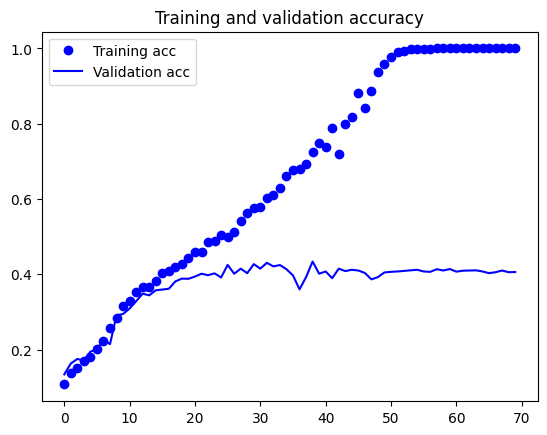

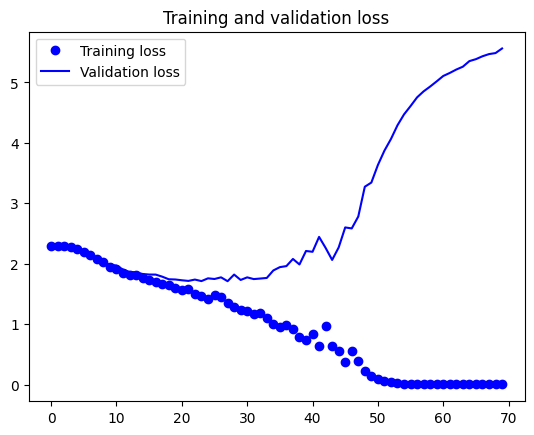

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Here we can see clear overfitting, training loss is decreasing but validation loss is increasing. We can see large difference between training and validation curves.

To counter this, we can try data augmentation as a regularizer. 

### Model 2 (with Data Augmentation)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

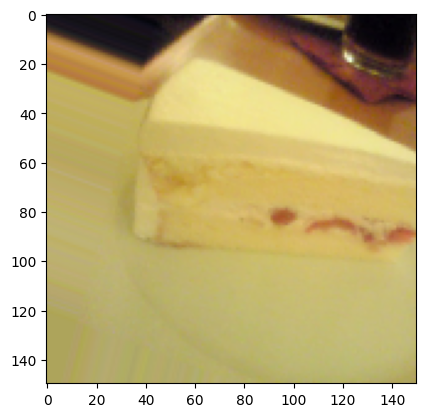

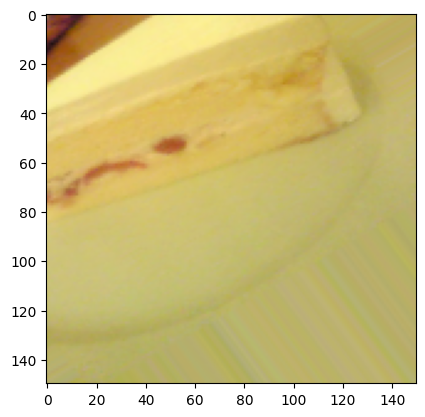

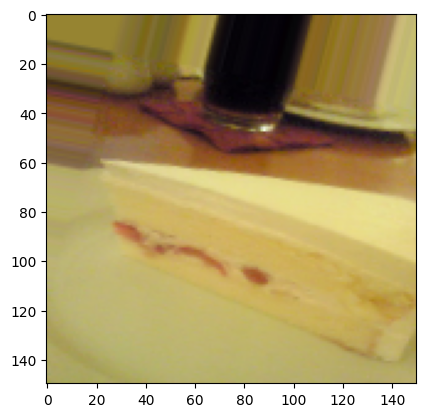

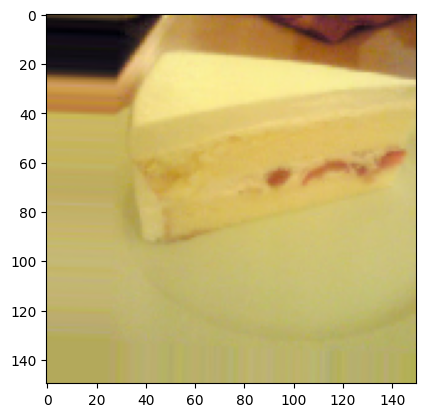

In [25]:
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
base_dir_visual = 'C:\\Users\\marke\\DEEP LEARNING\\Assignment 1\\train'
train_dir_visual = os.path.join(base_dir_visual, 'strawberry_shortcake')

fnames = [os.path.join(train_dir_visual, fname) for fname in os.listdir(train_dir_visual)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(img_size, img_size))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        

plt.show()

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

aug_train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')



Found 7502 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.
Found 502 images belonging to 10 classes.


In [27]:
firstmodel = models.Sequential()
firstmodel.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
firstmodel.add(layers.MaxPooling2D((2, 2)))
firstmodel.add(layers.Conv2D(32, (3, 3), activation='relu')) 
firstmodel.add(layers.MaxPooling2D((2, 2)))
firstmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
firstmodel.add(layers.MaxPooling2D((2, 2)))
firstmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
firstmodel.add(layers.MaxPooling2D((2, 2)))
firstmodel.add(layers.Flatten())
firstmodel.add(layers.Dense(128, activation='relu'))
firstmodel.add(layers.Dense(10, activation='softmax'))

firstmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

In [28]:
history = firstmodel.fit(
      aug_train_generator,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=70,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/70
150/150 [==============================] - 33s 218ms/step - loss: 2.3006 - acc: 0.1092 - val_loss: 2.2969 - val_acc: 0.1325
Epoch 2/70
150/150 [==============================] - 33s 219ms/step - loss: 2.2943 - acc: 0.1406 - val_loss: 2.2871 - val_acc: 0.1605
Epoch 3/70
150/150 [==============================] - 34s 223ms/step - loss: 2.2809 - acc: 0.1554 - val_loss: 2.2667 - val_acc: 0.1610
Epoch 4/70
150/150 [==============================] - 34s 226ms/step - loss: 2.2568 - acc: 0.1660 - val_loss: 2.2327 - val_acc: 0.1750
Epoch 5/70
150/150 [==============================] - 38s 252ms/step - loss: 2.2259 - acc: 0.1790 - val_loss: 2.2017 - val_acc: 0.1715
Epoch 6/70
150/150 [==============================] - 38s 256ms/step - loss: 2.1921 - acc: 0.1924 - val_loss: 2.1578 - val_acc: 0.2345
Epoch 7/70
150/150 [==============================] - 40s 264ms/step - loss: 2.1515 - acc: 0.2134 - val_loss: 2.0965 - val_acc: 0.2585
Epoch 8/70
150/150 [==============================] - 3

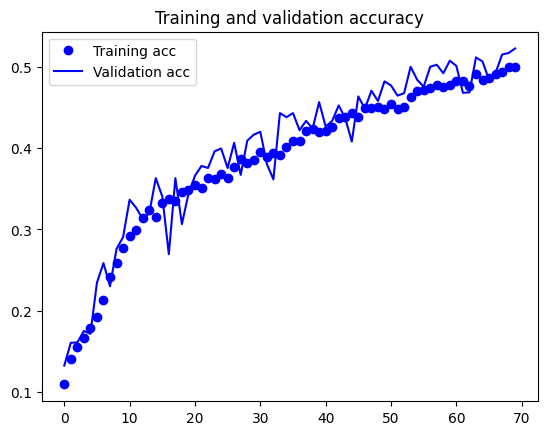

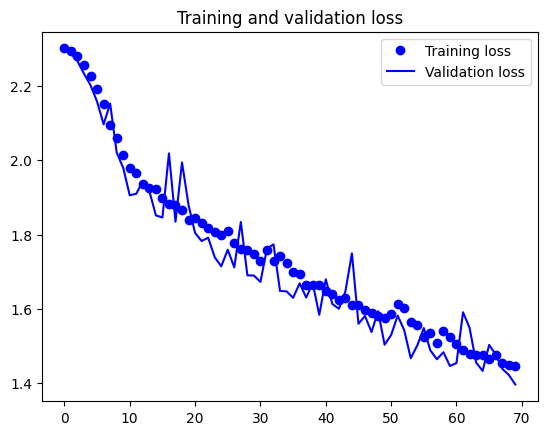

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Here, we can see the model is underfitting. The training loss is had gotten a lot highter and training accuracy dropped a lot compared to the model with no augmentation.

To counter underfitting, we can increase the model capacity and allow the model to capture more complex patterns

### Model 2.1: Doubled node count

In [30]:
# increased layer size

secondmodel = models.Sequential()
secondmodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
secondmodel.add(layers.MaxPooling2D((2, 2)))
secondmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
secondmodel.add(layers.MaxPooling2D((2, 2)))
secondmodel.add(layers.Conv2D(128, (3, 3), activation='relu')) 
secondmodel.add(layers.MaxPooling2D((2, 2)))
secondmodel.add(layers.Conv2D(256, (3, 3), activation='relu')) 
secondmodel.add(layers.MaxPooling2D((2, 2)))
secondmodel.add(layers.Flatten())
secondmodel.add(layers.Dense(512, activation='relu'))
secondmodel.add(layers.Dense(10, activation='softmax'))

secondmodel.summary()

secondmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [32]:
history2 = secondmodel.fit(
      aug_train_generator,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=70,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/70
150/150 [==============================] - 35s 233ms/step - loss: 2.2985 - acc: 0.1210 - val_loss: 2.2937 - val_acc: 0.1515
Epoch 2/70
150/150 [==============================] - 34s 224ms/step - loss: 2.2898 - acc: 0.1418 - val_loss: 2.2816 - val_acc: 0.1405
Epoch 3/70
150/150 [==============================] - 33s 218ms/step - loss: 2.2712 - acc: 0.1652 - val_loss: 2.2509 - val_acc: 0.1770
Epoch 4/70
150/150 [==============================] - 33s 219ms/step - loss: 2.2414 - acc: 0.1700 - val_loss: 2.2142 - val_acc: 0.1945
Epoch 5/70
150/150 [==============================] - 34s 224ms/step - loss: 2.2180 - acc: 0.1906 - val_loss: 2.1825 - val_acc: 0.2255
Epoch 6/70
150/150 [==============================] - 33s 217ms/step - loss: 2.1798 - acc: 0.1990 - val_loss: 2.1404 - val_acc: 0.2405
Epoch 7/70
150/150 [==============================] - 33s 218ms/step - loss: 2.1451 - acc: 0.2252 - val_loss: 2.1883 - val_acc: 0.2005
Epoch 8/70
150/150 [==============================] - 3

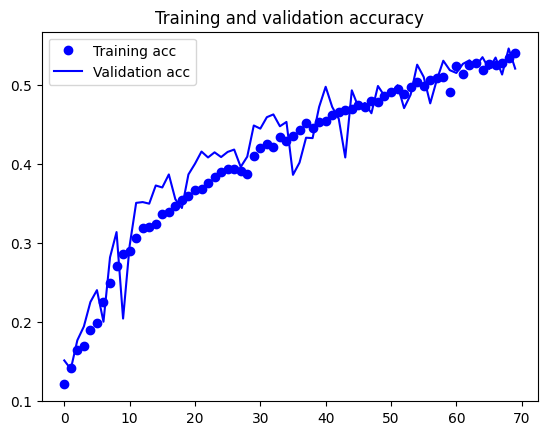

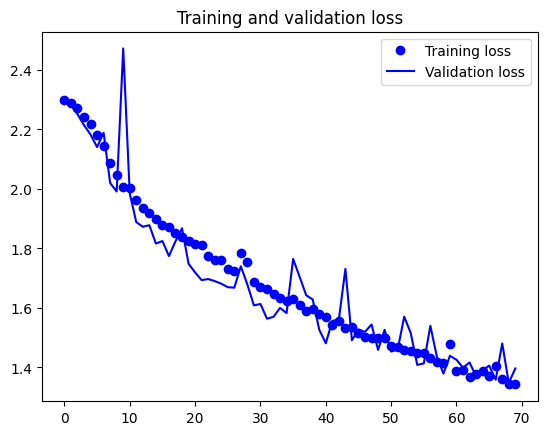

In [33]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Accuracy scores are better. Best epoch score (69 epochs) has 0.5465 val accuracy, however, the model is still underfitting

### Model 3: Added Conv2D layer

In [5]:
# increased layer size

thirdmodel = models.Sequential()
thirdmodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
thirdmodel.add(layers.MaxPooling2D((2, 2)))
thirdmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
thirdmodel.add(layers.MaxPooling2D((2, 2)))
thirdmodel.add(layers.Conv2D(128, (3, 3), activation='relu')) 
thirdmodel.add(layers.MaxPooling2D((2, 2)))
thirdmodel.add(layers.Conv2D(256, (3, 3), activation='relu')) 
thirdmodel.add(layers.Conv2D(512, (3, 3), activation='relu')) # added layer of 512 filters
thirdmodel.add(layers.MaxPooling2D((2, 2)))
thirdmodel.add(layers.Flatten())
thirdmodel.add(layers.Dense(512, activation='relu'))
thirdmodel.add(layers.Dense(10, activation='softmax'))

thirdmodel.summary() # model parameters increased to 11 million

thirdmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [37]:
history3 = thirdmodel.fit(
      aug_train_generator,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=70,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/70
150/150 [==============================] - 37s 231ms/step - loss: 2.3017 - acc: 0.1035 - val_loss: 2.2972 - val_acc: 0.1650
Epoch 2/70
150/150 [==============================] - 34s 229ms/step - loss: 2.2966 - acc: 0.1299 - val_loss: 2.2907 - val_acc: 0.1545
Epoch 3/70
150/150 [==============================] - 34s 227ms/step - loss: 2.2864 - acc: 0.1554 - val_loss: 2.2745 - val_acc: 0.1690
Epoch 4/70
150/150 [==============================] - 34s 226ms/step - loss: 2.2655 - acc: 0.1575 - val_loss: 2.2465 - val_acc: 0.1555
Epoch 5/70
150/150 [==============================] - 34s 226ms/step - loss: 2.2374 - acc: 0.1695 - val_loss: 2.2114 - val_acc: 0.1670
Epoch 6/70
150/150 [==============================] - 34s 226ms/step - loss: 2.2086 - acc: 0.1910 - val_loss: 2.2231 - val_acc: 0.1635
Epoch 7/70
150/150 [==============================] - 34s 227ms/step - loss: 2.1692 - acc: 0.2127 - val_loss: 2.1303 - val_acc: 0.2305
Epoch 8/70
150/150 [==============================] - 3

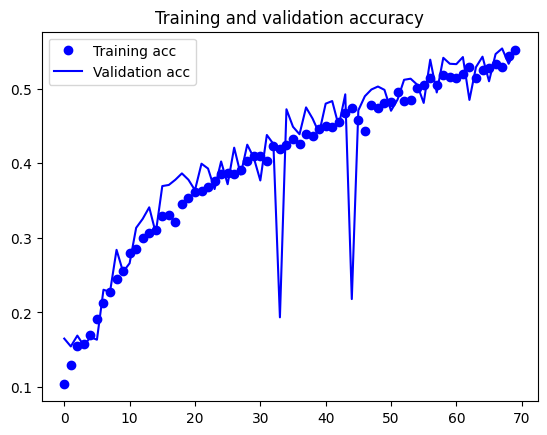

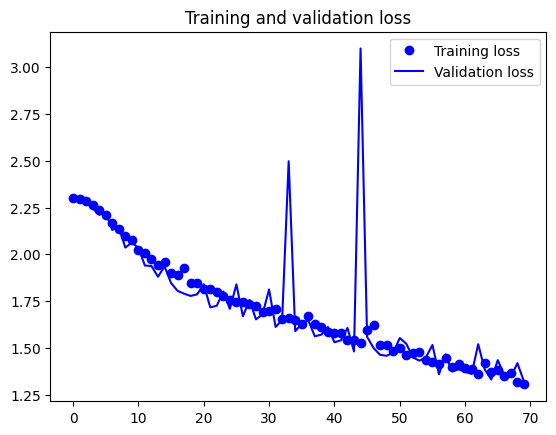

In [38]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The data augmentation could have introduced too much noise into the train data for the model to be able to capture patterns while training. Here, we can tweak the augmentation parameters to see if that helps the underfitting whilst not causing the model to overfit. We also increase number of epochs to 100

### Model 3.2: Remove some data augmentation parameters

In [6]:
train_datagen3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,)

aug_train_generator3 = train_datagen3.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7502 images belonging to 10 classes.


In [11]:
history5 = thirdmodel.fit(
      aug_train_generator3,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 54s 360ms/step - loss: 2.2930 - acc: 0.1323 - val_loss: 2.2830 - val_acc: 0.1660
Epoch 2/100
150/150 [==============================] - 41s 274ms/step - loss: 2.2715 - acc: 0.1527 - val_loss: 2.2503 - val_acc: 0.1680
Epoch 3/100
150/150 [==============================] - 45s 299ms/step - loss: 2.2413 - acc: 0.1647 - val_loss: 2.2300 - val_acc: 0.1830
Epoch 4/100
150/150 [==============================] - 46s 309ms/step - loss: 2.2202 - acc: 0.1757 - val_loss: 2.2425 - val_acc: 0.1710
Epoch 5/100
150/150 [==============================] - 47s 315ms/step - loss: 2.2007 - acc: 0.1927 - val_loss: 2.1766 - val_acc: 0.2035
Epoch 6/100
150/150 [==============================] - 44s 290ms/step - loss: 2.1688 - acc: 0.2131 - val_loss: 2.1449 - val_acc: 0.2470
Epoch 7/100
150/150 [==============================] - 38s 252ms/step - loss: 2.1295 - acc: 0.2317 - val_loss: 2.0682 - val_acc: 0.2820
Epoch 8/100
150/150 [===========================

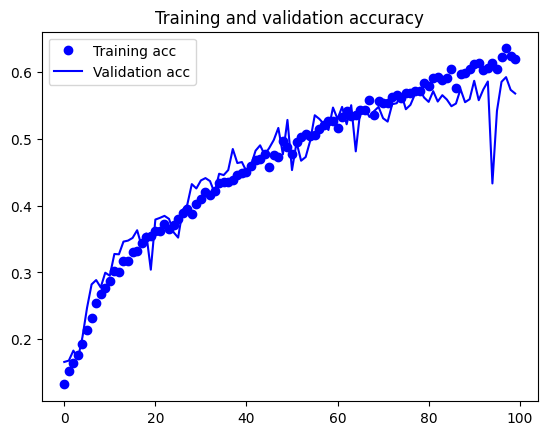

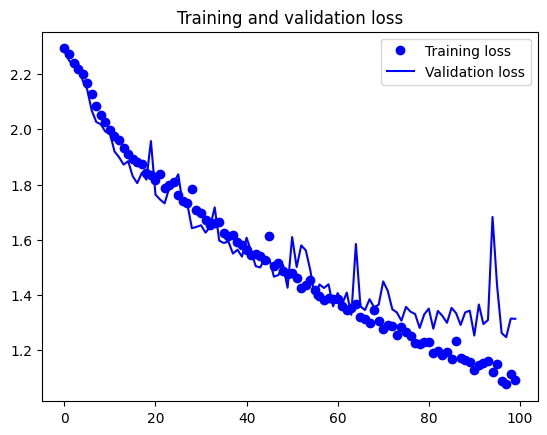

In [12]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 3.3: Remove more augmentation parameters

In [12]:
train_datagen4 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,)

aug_train_generator4 = train_datagen4.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7502 images belonging to 10 classes.


In [15]:
history6 = thirdmodel.fit(
      aug_train_generator4,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 32s 208ms/step - loss: 2.3006 - acc: 0.1161 - val_loss: 2.2973 - val_acc: 0.1035
Epoch 2/100
150/150 [==============================] - 34s 223ms/step - loss: 2.2944 - acc: 0.1291 - val_loss: 2.2935 - val_acc: 0.1000
Epoch 3/100
150/150 [==============================] - 35s 237ms/step - loss: 2.2790 - acc: 0.1585 - val_loss: 2.2629 - val_acc: 0.1480
Epoch 4/100
150/150 [==============================] - 36s 240ms/step - loss: 2.2434 - acc: 0.1675 - val_loss: 2.2561 - val_acc: 0.1750
Epoch 5/100
150/150 [==============================] - 41s 275ms/step - loss: 2.2076 - acc: 0.1940 - val_loss: 2.1674 - val_acc: 0.2305
Epoch 6/100
150/150 [==============================] - 41s 275ms/step - loss: 2.1588 - acc: 0.2169 - val_loss: 2.1354 - val_acc: 0.2240
Epoch 7/100
150/150 [==============================] - 39s 258ms/step - loss: 2.1044 - acc: 0.2379 - val_loss: 2.0739 - val_acc: 0.2520
Epoch 8/100
150/150 [===========================

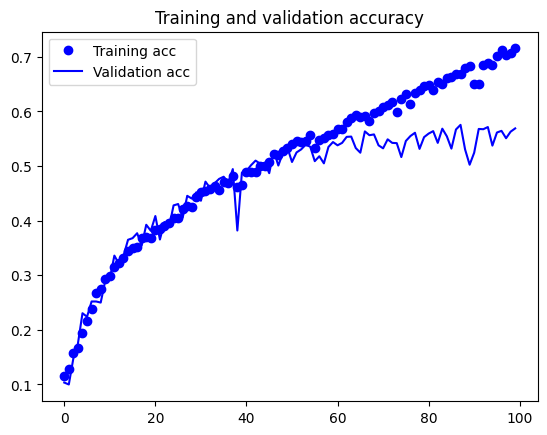

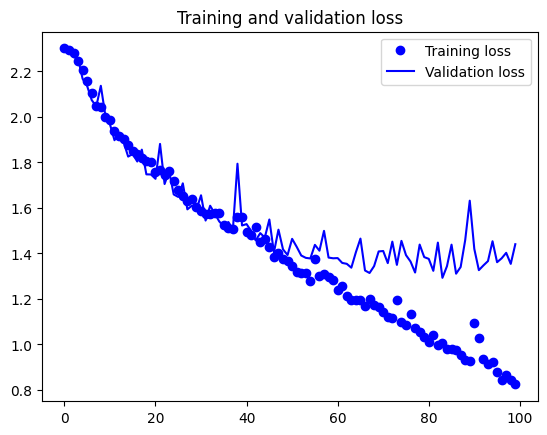

In [16]:
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The model is slightly overfitting, dropout layer

### Model 4: Add in Dropout layers

In [8]:
fourthmodel = models.Sequential()
fourthmodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
fourthmodel.add(layers.MaxPooling2D((2, 2)))

fourthmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
fourthmodel.add(layers.MaxPooling2D((2, 2)))

fourthmodel.add(layers.Conv2D(128, (3, 3), activation='relu')) 
fourthmodel.add(layers.MaxPooling2D((2, 2)))

fourthmodel.add(layers.Conv2D(256, (3, 3), activation='relu')) 
fourthmodel.add(layers.Conv2D(512, (3, 3), activation='relu')) 
fourthmodel.add(layers.MaxPooling2D((2, 2)))

fourthmodel.add(layers.Flatten())
fourthmodel.add(layers.Dense(512, activation='relu'))
fourthmodel.add(layers.Dropout(0.5))  # added dropout layer of 0.5

fourthmodel.add(layers.Dense(10, activation='softmax'))

fourthmodel.summary() 

fourthmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [9]:
history7 = fourthmodel.fit(
      aug_train_generator4,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 68s 357ms/step - loss: 2.3019 - acc: 0.1064 - val_loss: 2.3000 - val_acc: 0.1190
Epoch 2/100
150/150 [==============================] - 48s 322ms/step - loss: 2.2993 - acc: 0.1188 - val_loss: 2.2969 - val_acc: 0.1300
Epoch 3/100
150/150 [==============================] - 48s 319ms/step - loss: 2.2951 - acc: 0.1314 - val_loss: 2.2911 - val_acc: 0.1545
Epoch 4/100
150/150 [==============================] - 52s 348ms/step - loss: 2.2844 - acc: 0.1503 - val_loss: 2.2704 - val_acc: 0.1535
Epoch 5/100
150/150 [==============================] - 50s 330ms/step - loss: 2.2603 - acc: 0.1596 - val_loss: 2.2624 - val_acc: 0.1605
Epoch 6/100
150/150 [==============================] - 45s 301ms/step - loss: 2.2401 - acc: 0.1629 - val_loss: 2.2179 - val_acc: 0.1965
Epoch 7/100
150/150 [==============================] - 670s 4s/step - loss: 2.2158 - acc: 0.1771 - val_loss: 2.1930 - val_acc: 0.1945
Epoch 8/100
150/150 [=============================

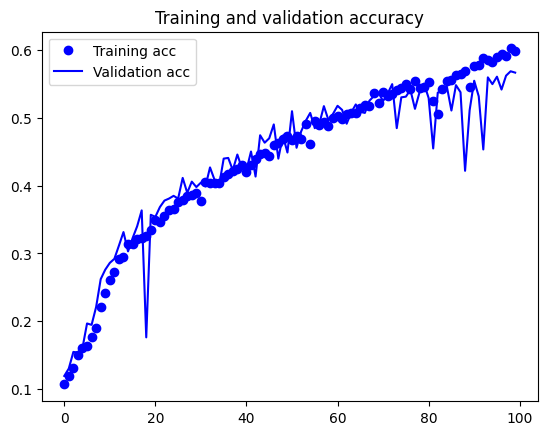

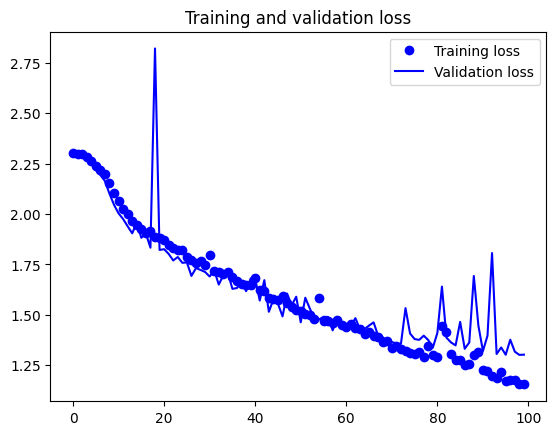

In [10]:
acc = history7.history['acc']
val_acc = history7.history['val_acc']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 4.1: Reduced dropout rate

In [11]:
fifthmodel = models.Sequential()
fifthmodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
fifthmodel.add(layers.MaxPooling2D((2, 2)))

fifthmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
fifthmodel.add(layers.MaxPooling2D((2, 2)))

fifthmodel.add(layers.Conv2D(128, (3, 3), activation='relu')) 
fifthmodel.add(layers.MaxPooling2D((2, 2)))

fifthmodel.add(layers.Conv2D(256, (3, 3), activation='relu')) 
fifthmodel.add(layers.Conv2D(512, (3, 3), activation='relu')) 
fifthmodel.add(layers.MaxPooling2D((2, 2)))

fifthmodel.add(layers.Flatten())
fifthmodel.add(layers.Dense(512, activation='relu'))
fifthmodel.add(layers.Dropout(0.2))  # changed from 0.5 to 0.2

fifthmodel.add(layers.Dense(10, activation='softmax'))

fifthmodel.summary() 

fifthmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [12]:
history8 = fifthmodel.fit(
      aug_train_generator4,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 35s 228ms/step - loss: 2.3016 - acc: 0.1078 - val_loss: 2.2987 - val_acc: 0.1025
Epoch 2/100
150/150 [==============================] - 38s 252ms/step - loss: 2.2959 - acc: 0.1311 - val_loss: 2.2914 - val_acc: 0.1205
Epoch 3/100
150/150 [==============================] - 49s 323ms/step - loss: 2.2859 - acc: 0.1448 - val_loss: 2.2779 - val_acc: 0.1660
Epoch 4/100
150/150 [==============================] - 49s 325ms/step - loss: 2.2656 - acc: 0.1566 - val_loss: 2.2445 - val_acc: 0.1720
Epoch 5/100
150/150 [==============================] - 50s 334ms/step - loss: 2.2380 - acc: 0.1667 - val_loss: 2.2164 - val_acc: 0.1920
Epoch 6/100
150/150 [==============================] - 50s 334ms/step - loss: 2.2170 - acc: 0.1790 - val_loss: 2.2015 - val_acc: 0.1905
Epoch 7/100
150/150 [==============================] - 41s 270ms/step - loss: 2.1930 - acc: 0.1994 - val_loss: 2.1655 - val_acc: 0.2220
Epoch 8/100
150/150 [===========================

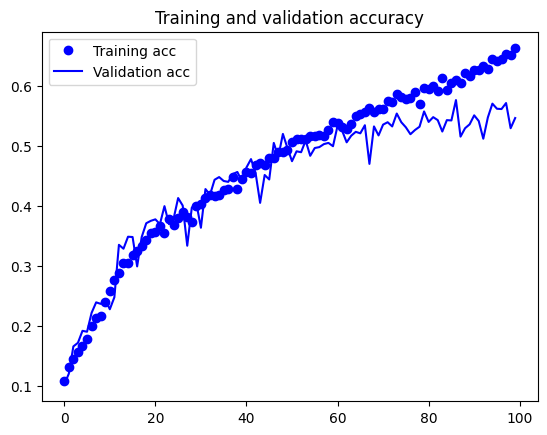

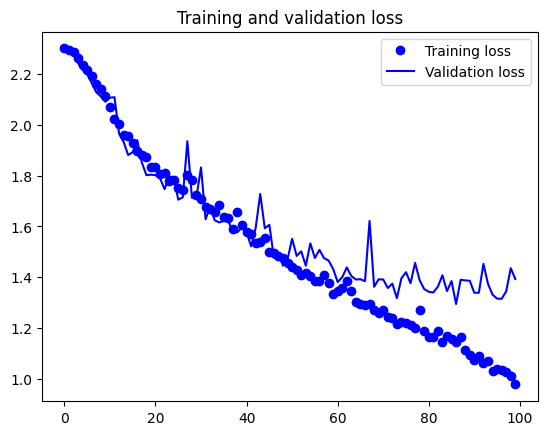

In [13]:
acc = history8.history['acc']
val_acc = history8.history['val_acc']
loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Still slightly over fitted 

### Model 5: Added Batch Normalization layers

In [8]:
sixthmodel = models.Sequential()
sixthmodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
sixthmodel.add(BatchNormalization())
sixthmodel.add(layers.MaxPooling2D((2, 2)))

sixthmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
sixthmodel.add(BatchNormalization())
sixthmodel.add(layers.MaxPooling2D((2, 2)))

sixthmodel.add(layers.Conv2D(128, (3, 3), activation='relu')) 
sixthmodel.add(BatchNormalization())
sixthmodel.add(layers.MaxPooling2D((2, 2)))

sixthmodel.add(layers.Conv2D(256, (3, 3), activation='relu')) 
sixthmodel.add(BatchNormalization())
sixthmodel.add(layers.Conv2D(512, (3, 3), activation='relu')) 
sixthmodel.add(BatchNormalization())
sixthmodel.add(layers.MaxPooling2D((2, 2)))

sixthmodel.add(layers.Flatten())
sixthmodel.add(layers.Dense(512, activation='relu'))
sixthmodel.add(BatchNormalization())
sixthmodel.add(layers.Dropout(0.2))  

sixthmodel.add(layers.Dense(10, activation='softmax'))

sixthmodel.summary() 

sixthmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                        

In [9]:
history9 = sixthmodel.fit(
      aug_train_generator4,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 48s 252ms/step - loss: 2.3445 - acc: 0.2704 - val_loss: 2.7019 - val_acc: 0.1385
Epoch 2/100
150/150 [==============================] - 34s 224ms/step - loss: 1.9714 - acc: 0.3488 - val_loss: 2.3866 - val_acc: 0.2260
Epoch 3/100
150/150 [==============================] - 32s 215ms/step - loss: 1.8648 - acc: 0.3768 - val_loss: 12.8792 - val_acc: 0.1055
Epoch 4/100
150/150 [==============================] - 33s 220ms/step - loss: 1.9424 - acc: 0.3427 - val_loss: 2.9391 - val_acc: 0.2000
Epoch 5/100
150/150 [==============================] - 33s 220ms/step - loss: 1.8930 - acc: 0.3600 - val_loss: 1.8339 - val_acc: 0.3560
Epoch 6/100
150/150 [==============================] - 33s 220ms/step - loss: 1.7148 - acc: 0.4145 - val_loss: 1.7316 - val_acc: 0.4065
Epoch 7/100
150/150 [==============================] - 33s 216ms/step - loss: 1.7197 - acc: 0.4082 - val_loss: 1.9880 - val_acc: 0.3545
Epoch 8/100
150/150 [==========================

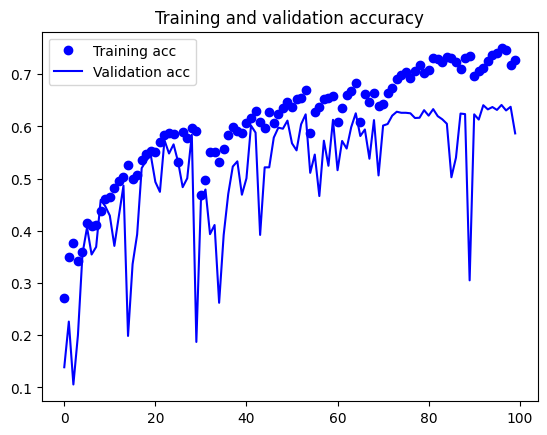

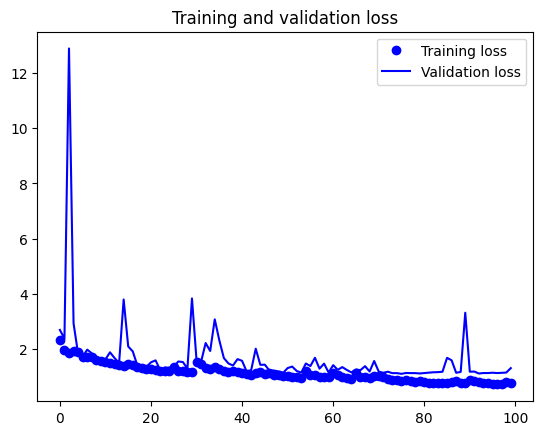

In [10]:
acc = history9.history['acc']
val_acc = history9.history['val_acc']
loss = history9.history['loss']
val_loss = history9.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We see a lot of fluctuations in validation scores compared to training scores, a few possible solutions are batch sizes, learning rates, optimizers and momentum

### Model 5.1: Reduced momentum of batch norm layers

In [12]:
momentummodel = models.Sequential()
momentummodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
momentummodel.add(BatchNormalization(momentum=0.9)) # reduced to 0.9 default is 0.99
momentummodel.add(layers.MaxPooling2D((2, 2)))

momentummodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
momentummodel.add(BatchNormalization(momentum=0.9))
momentummodel.add(layers.MaxPooling2D((2, 2)))

momentummodel.add(layers.Conv2D(128, (3, 3), activation='relu')) 
momentummodel.add(BatchNormalization(momentum=0.9))
momentummodel.add(layers.MaxPooling2D((2, 2)))

momentummodel.add(layers.Conv2D(256, (3, 3), activation='relu')) 
momentummodel.add(BatchNormalization(momentum=0.9))
momentummodel.add(layers.Conv2D(512, (3, 3), activation='relu')) 
momentummodel.add(BatchNormalization(momentum=0.9))
momentummodel.add(layers.MaxPooling2D((2, 2)))

momentummodel.add(layers.Flatten())
momentummodel.add(layers.Dense(512, activation='relu'))
momentummodel.add(BatchNormalization(momentum=0.9))
momentummodel.add(layers.Dropout(0.2))  

momentummodel.add(layers.Dense(10, activation='softmax'))

momentummodel.summary() 

momentummodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 72, 72, 64)       256       
 chNormalization)                                                
                                                      

In [13]:
history10 = momentummodel.fit(
      aug_train_generator4,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 38s 246ms/step - loss: 2.5054 - acc: 0.2425 - val_loss: 2.1457 - val_acc: 0.3055
Epoch 2/100
150/150 [==============================] - 33s 220ms/step - loss: 2.1300 - acc: 0.3006 - val_loss: 1.8336 - val_acc: 0.3815
Epoch 3/100
150/150 [==============================] - 40s 266ms/step - loss: 1.8719 - acc: 0.3639 - val_loss: 1.9576 - val_acc: 0.3590
Epoch 4/100
150/150 [==============================] - 40s 263ms/step - loss: 1.8384 - acc: 0.3787 - val_loss: 1.7631 - val_acc: 0.4040
Epoch 5/100
150/150 [==============================] - 37s 245ms/step - loss: 1.7357 - acc: 0.4058 - val_loss: 1.8109 - val_acc: 0.4100
Epoch 6/100
150/150 [==============================] - 38s 252ms/step - loss: 1.6605 - acc: 0.4302 - val_loss: 1.6768 - val_acc: 0.4385
Epoch 7/100
150/150 [==============================] - 39s 262ms/step - loss: 1.5952 - acc: 0.4538 - val_loss: 1.6794 - val_acc: 0.4350
Epoch 8/100
150/150 [===========================

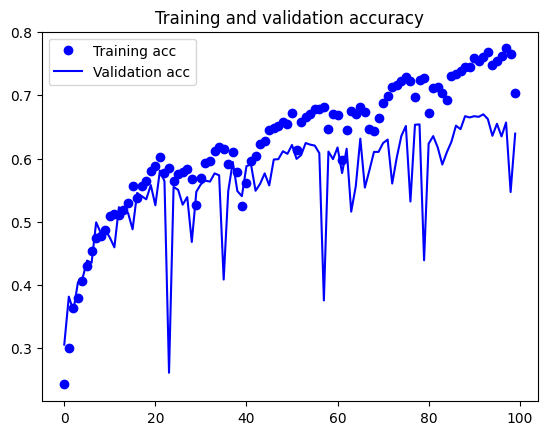

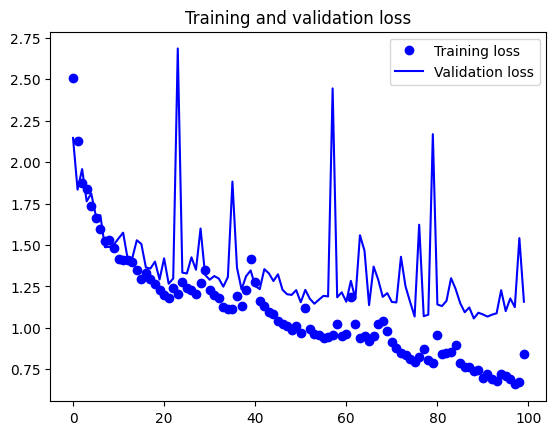

In [14]:
acc = history10.history['acc']
val_acc = history10.history['val_acc']
loss = history10.history['loss']
val_loss = history10.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 5.2: Further reduced momentum

In [10]:
momentummodel2 = models.Sequential()
momentummodel2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
momentummodel2.add(BatchNormalization(momentum=0.8)) # reduced to 0.8 from 0.9
momentummodel2.add(layers.MaxPooling2D((2, 2)))

momentummodel2.add(layers.Conv2D(64, (3, 3), activation='relu')) 
momentummodel2.add(BatchNormalization(momentum=0.8))
momentummodel2.add(layers.MaxPooling2D((2, 2)))

momentummodel2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
momentummodel2.add(BatchNormalization(momentum=0.8))
momentummodel2.add(layers.MaxPooling2D((2, 2)))

momentummodel2.add(layers.Conv2D(256, (3, 3), activation='relu')) 
momentummodel2.add(BatchNormalization(momentum=0.8))
momentummodel2.add(layers.Conv2D(512, (3, 3), activation='relu')) 
momentummodel2.add(BatchNormalization(momentum=0.8))
momentummodel2.add(layers.MaxPooling2D((2, 2)))

momentummodel2.add(layers.Flatten())
momentummodel2.add(layers.Dense(512, activation='relu'))
momentummodel2.add(BatchNormalization(momentum=0.8))
momentummodel2.add(layers.Dropout(0.2))  

momentummodel2.add(layers.Dense(10, activation='softmax'))

momentummodel2.summary() 

momentummodel2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                      

In [8]:
history11 = momentummodel2.fit(
      aug_train_generator4,
      steps_per_epoch=150, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 67s 348ms/step - loss: 2.4793 - acc: 0.2536 - val_loss: 2.4926 - val_acc: 0.2255
Epoch 2/100
150/150 [==============================] - 56s 369ms/step - loss: 2.1832 - acc: 0.2751 - val_loss: 1.8810 - val_acc: 0.3685
Epoch 3/100
150/150 [==============================] - 55s 364ms/step - loss: 2.0042 - acc: 0.3174 - val_loss: 1.8370 - val_acc: 0.3815
Epoch 4/100
150/150 [==============================] - 49s 325ms/step - loss: 1.8520 - acc: 0.3663 - val_loss: 2.0184 - val_acc: 0.3365
Epoch 5/100
150/150 [==============================] - 48s 317ms/step - loss: 1.8127 - acc: 0.3857 - val_loss: 1.7440 - val_acc: 0.4010
Epoch 6/100
150/150 [==============================] - 53s 351ms/step - loss: 1.7118 - acc: 0.4093 - val_loss: 1.9300 - val_acc: 0.3605
Epoch 7/100
150/150 [==============================] - 51s 338ms/step - loss: 1.6704 - acc: 0.4346 - val_loss: 1.5294 - val_acc: 0.4780
Epoch 8/100
150/150 [===========================

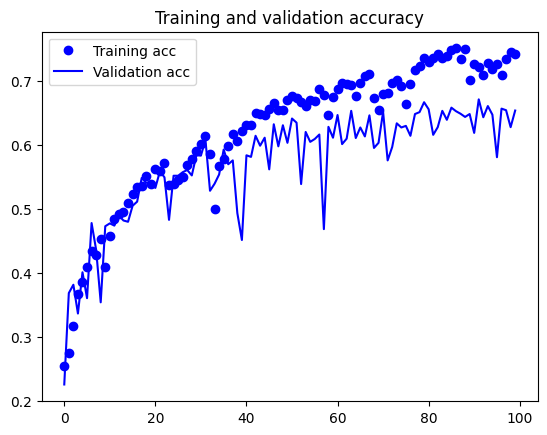

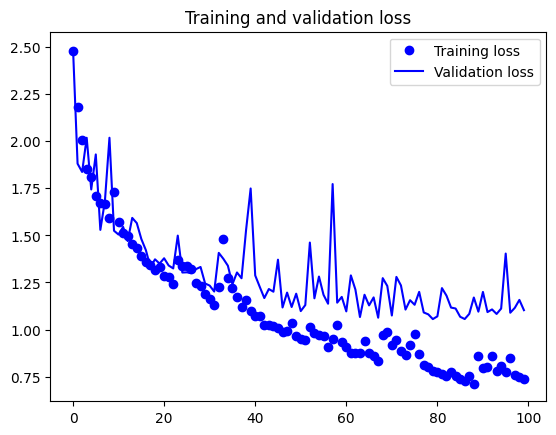

In [9]:
acc = history11.history['acc']
val_acc = history11.history['val_acc']
loss = history11.history['loss']
val_loss = history11.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

One more way we can reduce fluctuations is by increasing batch size

### Model 5.3: Increase batch size from 50 to 64

In [7]:
train_datagen4 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,)

aug_train_generator_64 = train_datagen4.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=64,
        class_mode='categorical')


validation_generator_64 = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=64,
        class_mode='categorical')


test_generator_64 = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=64,
        class_mode='categorical')

Found 7502 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.
Found 502 images belonging to 10 classes.


In [12]:
history12 = momentummodel2.fit(
      aug_train_generator_64,
      steps_per_epoch=117, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator_64,
      validation_steps=31)

Epoch 1/100
117/117 [==============================] - 39s 323ms/step - loss: 2.4429 - acc: 0.2534 - val_loss: 2.2534 - val_acc: 0.2903
Epoch 2/100
117/117 [==============================] - 42s 357ms/step - loss: 1.9845 - acc: 0.3467 - val_loss: 2.2453 - val_acc: 0.3397
Epoch 3/100
117/117 [==============================] - 45s 381ms/step - loss: 1.7945 - acc: 0.4009 - val_loss: 1.6510 - val_acc: 0.4486
Epoch 4/100
117/117 [==============================] - 49s 420ms/step - loss: 1.6914 - acc: 0.4252 - val_loss: 1.6798 - val_acc: 0.4511
Epoch 5/100
117/117 [==============================] - 46s 395ms/step - loss: 1.5908 - acc: 0.4538 - val_loss: 2.4585 - val_acc: 0.2651
Epoch 6/100
117/117 [==============================] - 47s 402ms/step - loss: 1.5345 - acc: 0.4758 - val_loss: 1.5328 - val_acc: 0.4728
Epoch 7/100
117/117 [==============================] - 49s 422ms/step - loss: 1.4886 - acc: 0.4888 - val_loss: 1.4899 - val_acc: 0.5055
Epoch 8/100
117/117 [===========================

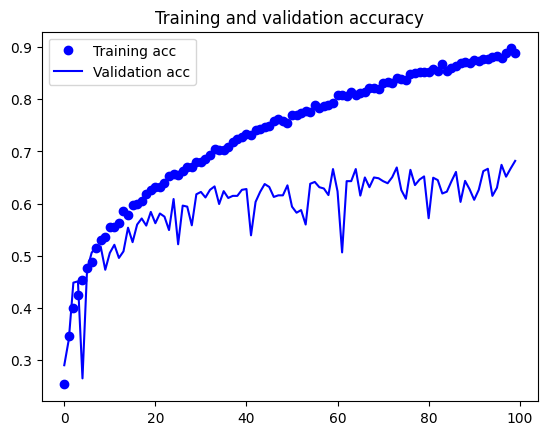

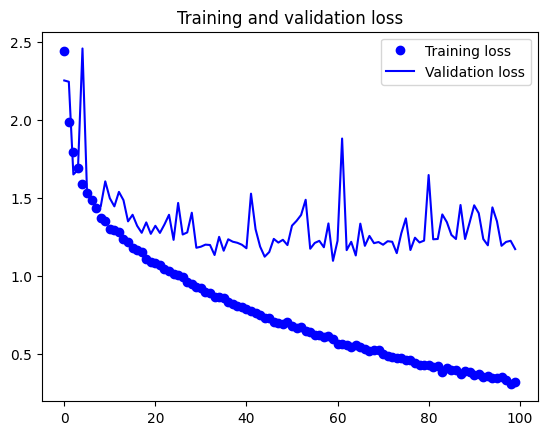

In [13]:
acc = history12.history['acc']
val_acc = history12.history['val_acc']
loss = history12.history['loss']
val_loss = history12.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Fluctuation is much lesser for training scores but model is now overfitted

### Model 5.4: Increased dropout rate back to 0.5

In [14]:
batchmodel = models.Sequential()
batchmodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
batchmodel.add(BatchNormalization(momentum=0.8)) 
batchmodel.add(layers.MaxPooling2D((2, 2)))

batchmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
batchmodel.add(BatchNormalization(momentum=0.8))
batchmodel.add(layers.MaxPooling2D((2, 2)))

batchmodel.add(layers.Conv2D(128, (3, 3), activation='relu')) 
batchmodel.add(BatchNormalization(momentum=0.8))
batchmodel.add(layers.MaxPooling2D((2, 2)))

batchmodel.add(layers.Conv2D(256, (3, 3), activation='relu')) 
batchmodel.add(BatchNormalization(momentum=0.8))
batchmodel.add(layers.Conv2D(512, (3, 3), activation='relu')) 
batchmodel.add(BatchNormalization(momentum=0.8))
batchmodel.add(layers.MaxPooling2D((2, 2)))

batchmodel.add(layers.Flatten())
batchmodel.add(layers.Dense(512, activation='relu'))
batchmodel.add(BatchNormalization(momentum=0.8))
batchmodel.add(layers.Dropout(0.5))   # increased dropout to 0.5 from 0.2

batchmodel.add(layers.Dense(10, activation='softmax'))

batchmodel.summary() 

batchmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 72, 72, 64)       256       
 chNormalization)                                                
                                                      

In [15]:
history13 = batchmodel.fit(
      aug_train_generator_64,
      steps_per_epoch=117, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator_64,
      validation_steps=31)

Epoch 1/100
117/117 [==============================] - 37s 305ms/step - loss: 2.7878 - acc: 0.2268 - val_loss: 2.0702 - val_acc: 0.3231
Epoch 2/100
117/117 [==============================] - 35s 299ms/step - loss: 2.2656 - acc: 0.3130 - val_loss: 1.9904 - val_acc: 0.3624
Epoch 3/100
117/117 [==============================] - 34s 293ms/step - loss: 2.0698 - acc: 0.3473 - val_loss: 1.8189 - val_acc: 0.4098
Epoch 4/100
117/117 [==============================] - 35s 294ms/step - loss: 1.9044 - acc: 0.3803 - val_loss: 1.6843 - val_acc: 0.4370
Epoch 5/100
117/117 [==============================] - 35s 295ms/step - loss: 1.7893 - acc: 0.4043 - val_loss: 1.6224 - val_acc: 0.4587
Epoch 6/100
117/117 [==============================] - 34s 289ms/step - loss: 1.7188 - acc: 0.4254 - val_loss: 1.5987 - val_acc: 0.4572
Epoch 7/100
117/117 [==============================] - 34s 286ms/step - loss: 1.6751 - acc: 0.4391 - val_loss: 1.5024 - val_acc: 0.4945
Epoch 8/100
117/117 [===========================

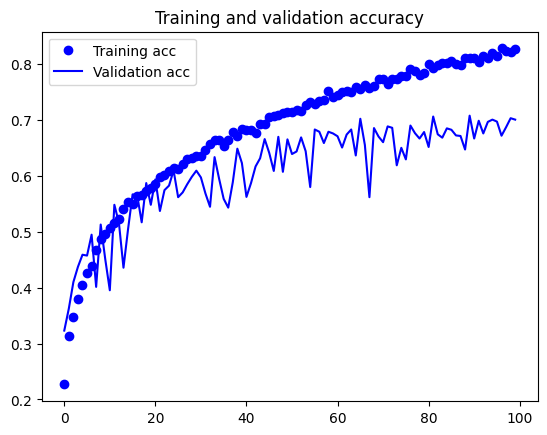

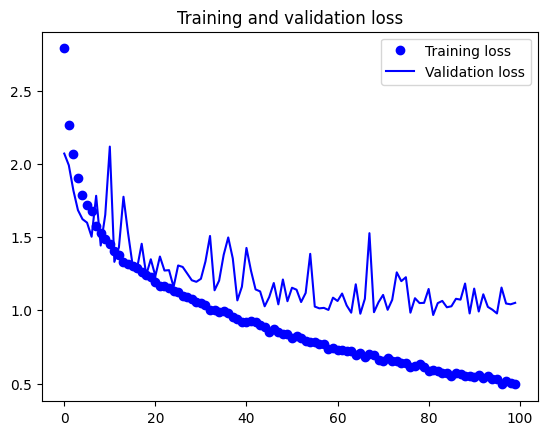

In [17]:
acc = history13.history['acc']
val_acc = history13.history['val_acc']
loss = history13.history['loss']
val_loss = history13.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 6: Added a dropout layer of 0.5

In [41]:
batchmodel2 = models.Sequential()
batchmodel2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
batchmodel2.add(BatchNormalization(momentum=0.8)) 
batchmodel2.add(layers.MaxPooling2D((2, 2)))

batchmodel2.add(layers.Conv2D(64, (3, 3), activation='relu')) 
batchmodel2.add(BatchNormalization(momentum=0.8))
batchmodel2.add(layers.MaxPooling2D((2, 2)))

batchmodel2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
batchmodel2.add(BatchNormalization(momentum=0.8))
batchmodel2.add(layers.MaxPooling2D((2, 2)))

batchmodel2.add(layers.Conv2D(256, (3, 3), activation='relu')) 
batchmodel2.add(BatchNormalization(momentum=0.8))
batchmodel2.add(layers.Conv2D(512, (3, 3), activation='relu')) 
batchmodel2.add(BatchNormalization(momentum=0.8))
batchmodel2.add(layers.MaxPooling2D((2, 2)))

batchmodel2.add(layers.Flatten())
batchmodel2.add(layers.Dropout(0.5)) # added a dropout layer of 0.5

batchmodel2.add(layers.Dense(512, activation='relu'))
batchmodel2.add(BatchNormalization(momentum=0.8))
batchmodel2.add(layers.Dropout(0.5))  

batchmodel2.add(layers.Dense(10, activation='softmax'))

batchmodel2.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_18 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_19 (Bat  (None, 72, 72, 64)       256       
 chNormalization)                                                
                                                      

In [ ]:
batchmodel2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['acc'])

In [22]:
history14 = batchmodel2.fit(
      aug_train_generator_64,
      steps_per_epoch=117, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator_64,
      validation_steps=31)

Epoch 1/100
117/117 [==============================] - 34s 280ms/step - loss: 2.9571 - acc: 0.2044 - val_loss: 2.0382 - val_acc: 0.3296
Epoch 2/100
117/117 [==============================] - 33s 281ms/step - loss: 2.4335 - acc: 0.2757 - val_loss: 1.8278 - val_acc: 0.3740
Epoch 3/100
117/117 [==============================] - 33s 281ms/step - loss: 2.1249 - acc: 0.3279 - val_loss: 1.7591 - val_acc: 0.3962
Epoch 4/100
117/117 [==============================] - 34s 290ms/step - loss: 2.0063 - acc: 0.3516 - val_loss: 1.7143 - val_acc: 0.4088
Epoch 5/100
117/117 [==============================] - 33s 281ms/step - loss: 1.8966 - acc: 0.3754 - val_loss: 1.6127 - val_acc: 0.4299
Epoch 6/100
117/117 [==============================] - 33s 284ms/step - loss: 1.8029 - acc: 0.3942 - val_loss: 1.6941 - val_acc: 0.4320
Epoch 7/100
117/117 [==============================] - 33s 284ms/step - loss: 1.7211 - acc: 0.4242 - val_loss: 1.6200 - val_acc: 0.4345
Epoch 8/100
117/117 [===========================

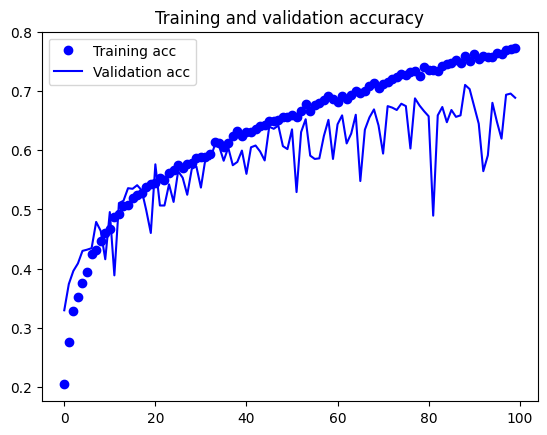

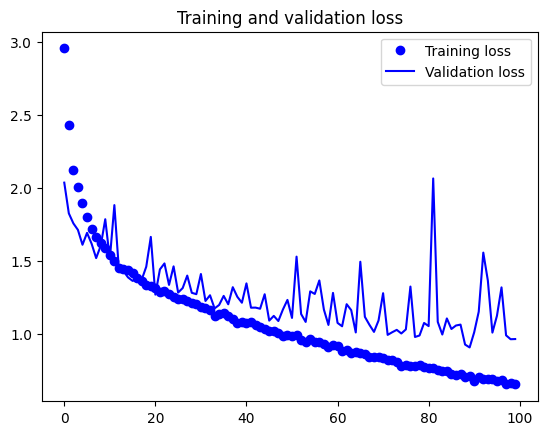

In [23]:
acc = history14.history['acc']
val_acc = history14.history['val_acc']
loss = history14.history['loss']
val_loss = history14.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Lesser overfititng, towards the last few epochs, still fluctuations in validation scores. Can try different optimizers such as RMSprop and Adam as they have learning rate scheduler.

### Optimizers

Had to drop batch size as batch size of 64 was too computationally expensive for me to run, received a lot of ResourceExhaustedErrors when running the different optimizers. Used 32 as it was the next power of 2

In [19]:
train_datagen4 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,)

aug_train_generator_32 = train_datagen4.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


validation_generator_32 = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


test_generator_32 = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7502 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.
Found 502 images belonging to 10 classes.


#### Model 6.1: Adam Optimizer


In [42]:
batchmodel2.compile(loss='categorical_crossentropy',
              optimizer='adam', # adam optimizer with default learning rate
              metrics=['acc'])

In [30]:
history15 = batchmodel2.fit(
      aug_train_generator_32,
      steps_per_epoch=234, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator_32,
      validation_steps=63)

Epoch 1/100
234/234 [==============================] - 39s 161ms/step - loss: 2.6685 - acc: 0.2375 - val_loss: 1.8684 - val_acc: 0.3767
Epoch 2/100
234/234 [==============================] - 40s 172ms/step - loss: 2.0889 - acc: 0.3245 - val_loss: 1.7939 - val_acc: 0.3896
Epoch 3/100
234/234 [==============================] - 38s 164ms/step - loss: 1.8478 - acc: 0.3853 - val_loss: 1.6740 - val_acc: 0.4559
Epoch 4/100
234/234 [==============================] - 39s 165ms/step - loss: 1.6971 - acc: 0.4308 - val_loss: 1.6105 - val_acc: 0.4544
Epoch 5/100
234/234 [==============================] - 38s 162ms/step - loss: 1.5668 - acc: 0.4661 - val_loss: 1.5281 - val_acc: 0.4704
Epoch 6/100
234/234 [==============================] - 38s 163ms/step - loss: 1.4714 - acc: 0.5028 - val_loss: 1.4538 - val_acc: 0.5137
Epoch 7/100
234/234 [==============================] - 41s 175ms/step - loss: 1.3770 - acc: 0.5307 - val_loss: 1.2877 - val_acc: 0.5820
Epoch 8/100
234/234 [===========================

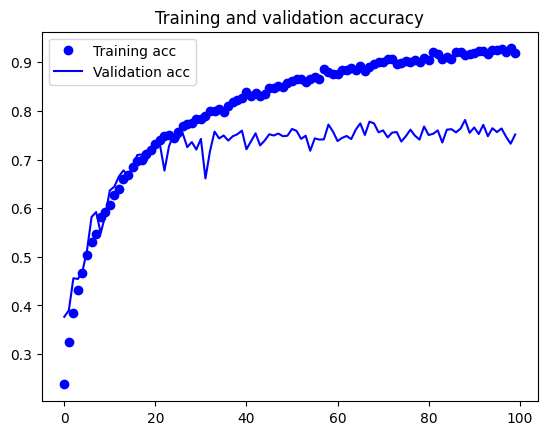

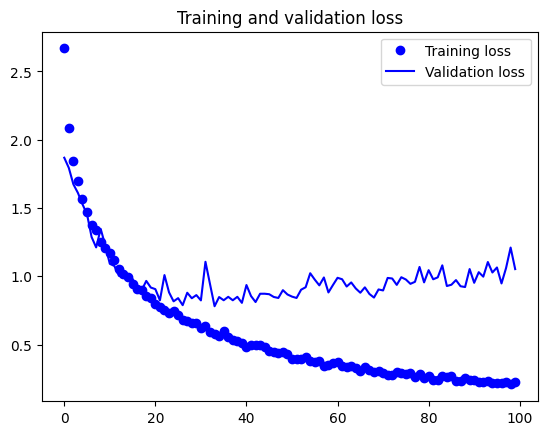

In [31]:
acc = history15.history['acc']
val_acc = history15.history['val_acc']
loss = history15.history['loss']
val_loss = history15.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
tf.keras.backend.clear_session()

#### Model 6.2: RMSprop

In [40]:
batchmodel2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', # rmsprop optimizer with default learning rate
              metrics=['acc'])

In [25]:
history16 = batchmodel2.fit(
      aug_train_generator_32,
      steps_per_epoch=234, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator_32,
      validation_steps=63)

Epoch 1/100
234/234 [==============================] - 46s 189ms/step - loss: 2.7110 - acc: 0.2238 - val_loss: 2.2829 - val_acc: 0.2745
Epoch 2/100
234/234 [==============================] - 39s 168ms/step - loss: 2.1295 - acc: 0.3059 - val_loss: 1.8317 - val_acc: 0.3956
Epoch 3/100
234/234 [==============================] - 41s 175ms/step - loss: 1.8981 - acc: 0.3738 - val_loss: 1.7914 - val_acc: 0.3772
Epoch 4/100
234/234 [==============================] - 44s 188ms/step - loss: 1.7112 - acc: 0.4262 - val_loss: 1.5831 - val_acc: 0.4454
Epoch 5/100
234/234 [==============================] - 45s 191ms/step - loss: 1.5901 - acc: 0.4655 - val_loss: 1.5133 - val_acc: 0.4893
Epoch 6/100
234/234 [==============================] - 44s 189ms/step - loss: 1.4878 - acc: 0.4954 - val_loss: 1.4847 - val_acc: 0.5087
Epoch 7/100
234/234 [==============================] - 45s 193ms/step - loss: 1.4040 - acc: 0.5202 - val_loss: 1.3789 - val_acc: 0.5426
Epoch 8/100
234/234 [===========================

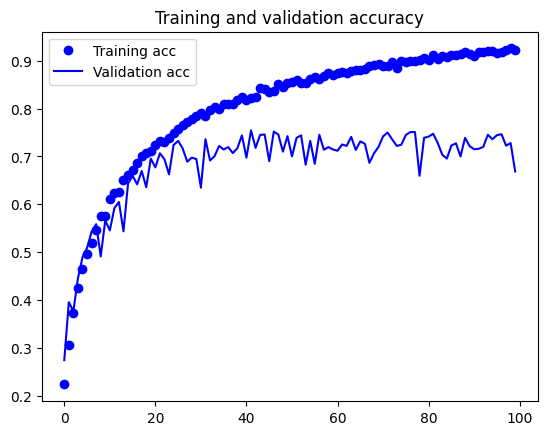

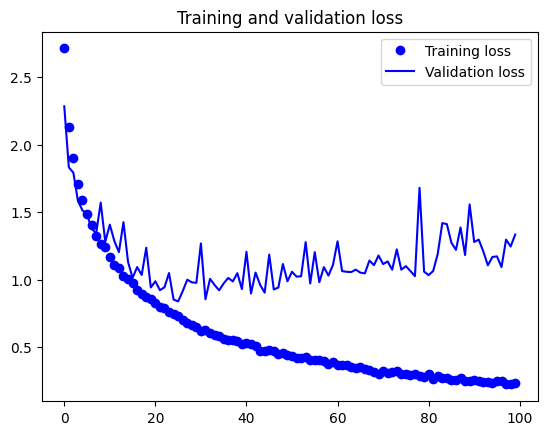

In [26]:
acc = history16.history['acc']
val_acc = history16.history['val_acc']
loss = history16.history['loss']
val_loss = history16.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Both models are overfitting, data fluctuations are lesser with Adam Optimizer. Fluctuations are quite little now

### More Regularization

Since we have already performed dropout layers, we can try different regularization methods

### Model 6.2: Added back data augmentation parameters

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator_32 = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


Found 7502 images belonging to 10 classes.


In [32]:
for data_batch, labels_batch in train_generator_32:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 10)


In [44]:
batchmodel2 = models.Sequential()
batchmodel2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
batchmodel2.add(BatchNormalization(momentum=0.8)) 
batchmodel2.add(layers.MaxPooling2D((2, 2)))

batchmodel2.add(layers.Conv2D(64, (3, 3), activation='relu')) 
batchmodel2.add(BatchNormalization(momentum=0.8))
batchmodel2.add(layers.MaxPooling2D((2, 2)))

batchmodel2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
batchmodel2.add(BatchNormalization(momentum=0.8))
batchmodel2.add(layers.MaxPooling2D((2, 2)))

batchmodel2.add(layers.Conv2D(256, (3, 3), activation='relu')) 
batchmodel2.add(BatchNormalization(momentum=0.8))
batchmodel2.add(layers.Conv2D(512, (3, 3), activation='relu')) 
batchmodel2.add(BatchNormalization(momentum=0.8))
batchmodel2.add(layers.MaxPooling2D((2, 2)))

batchmodel2.add(layers.Flatten())
batchmodel2.add(layers.Dropout(0.5)) # added a dropout layer of 0.5

batchmodel2.add(layers.Dense(512, activation='relu'))
batchmodel2.add(BatchNormalization(momentum=0.8))
batchmodel2.add(layers.Dropout(0.5))  

batchmodel2.add(layers.Dense(10, activation='softmax'))

In [45]:
batchmodel2.compile(loss='categorical_crossentropy',
              optimizer='adam', # adam optimizer with default learning rate
              metrics=['acc'])

In [46]:
history18 = batchmodel2.fit(
      train_generator_32,
      steps_per_epoch=234, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator_32,
      validation_steps=63)

Epoch 1/100
234/234 [==============================] - 43s 178ms/step - loss: 2.7303 - acc: 0.2169 - val_loss: 2.0426 - val_acc: 0.3084
Epoch 2/100
234/234 [==============================] - 41s 177ms/step - loss: 2.1863 - acc: 0.2906 - val_loss: 1.8946 - val_acc: 0.3617
Epoch 3/100
234/234 [==============================] - 45s 191ms/step - loss: 1.9381 - acc: 0.3613 - val_loss: 1.7408 - val_acc: 0.4086
Epoch 4/100
234/234 [==============================] - 42s 181ms/step - loss: 1.7876 - acc: 0.3952 - val_loss: 1.5930 - val_acc: 0.4604
Epoch 5/100
234/234 [==============================] - 42s 178ms/step - loss: 1.6498 - acc: 0.4300 - val_loss: 1.5641 - val_acc: 0.4684
Epoch 6/100
234/234 [==============================] - 40s 171ms/step - loss: 1.5612 - acc: 0.4596 - val_loss: 1.4003 - val_acc: 0.5237
Epoch 7/100
234/234 [==============================] - 41s 175ms/step - loss: 1.5068 - acc: 0.4827 - val_loss: 1.5685 - val_acc: 0.4808
Epoch 8/100
234/234 [===========================

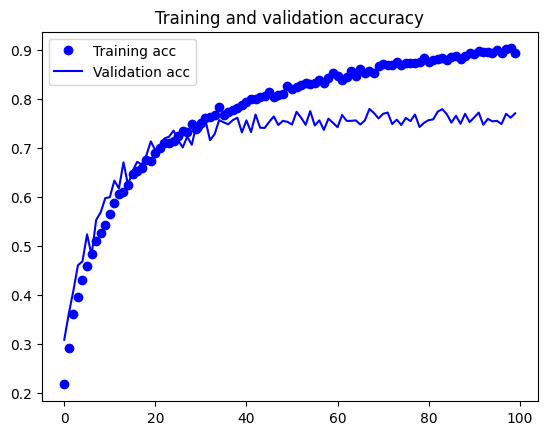

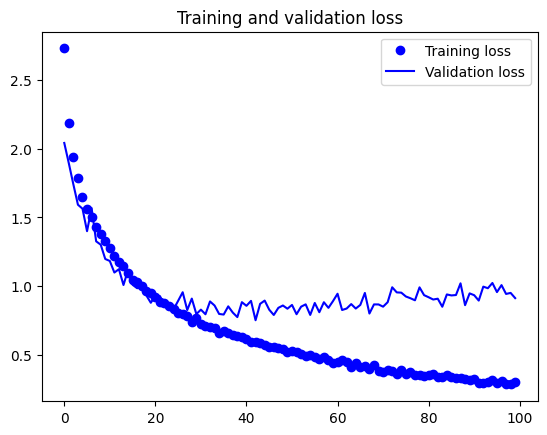

In [47]:
acc = history18.history['acc']
val_acc = history18.history['val_acc']
loss = history18.history['loss']
val_loss = history18.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see that around the 55 epoch, the loss starts to increase

### Model 7: Added L2 Weight Regularizers

In [13]:
# added L2 weight regularizers to each Conv2D layer

wrmodel = models.Sequential()
wrmodel.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001),activation='relu',
                        input_shape=(img_size, img_size, 3)))
wrmodel.add(BatchNormalization(momentum=0.8)) 
wrmodel.add(layers.MaxPooling2D((2, 2)))

wrmodel.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu')) 
wrmodel.add(BatchNormalization(momentum=0.8))
wrmodel.add(layers.MaxPooling2D((2, 2)))

wrmodel.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu')) 
wrmodel.add(BatchNormalization(momentum=0.8))
wrmodel.add(layers.MaxPooling2D((2, 2)))

wrmodel.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu')) 
wrmodel.add(BatchNormalization(momentum=0.8))
wrmodel.add(layers.Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu')) 
wrmodel.add(BatchNormalization(momentum=0.8))
wrmodel.add(layers.MaxPooling2D((2, 2)))

wrmodel.add(layers.Flatten())
wrmodel.add(layers.Dropout(0.5)) # added a dropout layer of 0.5

wrmodel.add(layers.Dense(512, activation='relu'))
wrmodel.add(BatchNormalization(momentum=0.8))
wrmodel.add(layers.Dropout(0.5))  

wrmodel.add(layers.Dense(10, activation='softmax'))

wrmodel.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                      

In [14]:
wrmodel.compile(loss='categorical_crossentropy',
              optimizer='adam', # adam optimizer with default learning rate
              metrics=['acc'])

In [15]:
history19 = wrmodel.fit(
      train_generator_32,
      steps_per_epoch=234, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator_32,
      validation_steps=63)

Epoch 1/100
234/234 [==============================] - 40s 164ms/step - loss: 3.4261 - acc: 0.2118 - val_loss: 3.0707 - val_acc: 0.2780
Epoch 2/100
234/234 [==============================] - 37s 157ms/step - loss: 2.8294 - acc: 0.2869 - val_loss: 2.5003 - val_acc: 0.3279
Epoch 3/100
234/234 [==============================] - 38s 161ms/step - loss: 2.4593 - acc: 0.3550 - val_loss: 2.3473 - val_acc: 0.3832
Epoch 4/100
234/234 [==============================] - 42s 179ms/step - loss: 2.2220 - acc: 0.3889 - val_loss: 2.0795 - val_acc: 0.4529
Epoch 5/100
234/234 [==============================] - 42s 179ms/step - loss: 2.0660 - acc: 0.4174 - val_loss: 1.8261 - val_acc: 0.4838
Epoch 6/100
234/234 [==============================] - 43s 182ms/step - loss: 1.9261 - acc: 0.4465 - val_loss: 1.7395 - val_acc: 0.5012
Epoch 7/100
234/234 [==============================] - 42s 179ms/step - loss: 1.8466 - acc: 0.4590 - val_loss: 1.8170 - val_acc: 0.4833
Epoch 8/100
234/234 [===========================

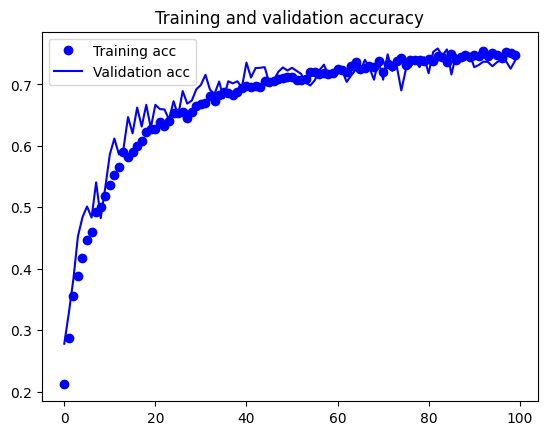

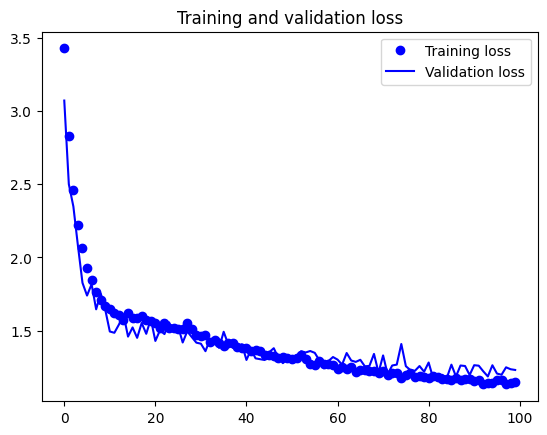

In [16]:
acc = history19.history['acc']
val_acc = history19.history['val_acc']
loss = history19.history['loss']
val_loss = history19.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 8: Used L1 Weight Regularizers

In [18]:
wrmodel2 = models.Sequential()
wrmodel2.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l1(0.001),activation='relu',
                        input_shape=(img_size, img_size, 3)))
wrmodel2.add(BatchNormalization(momentum=0.8)) 
wrmodel2.add(layers.MaxPooling2D((2, 2)))

wrmodel2.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l1(0.001), activation='relu')) 
wrmodel2.add(BatchNormalization(momentum=0.8))
wrmodel2.add(layers.MaxPooling2D((2, 2)))

wrmodel2.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l1(0.001), activation='relu')) 
wrmodel2.add(BatchNormalization(momentum=0.8))
wrmodel2.add(layers.MaxPooling2D((2, 2)))

wrmodel2.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l1(0.001), activation='relu')) 
wrmodel2.add(BatchNormalization(momentum=0.8))
wrmodel2.add(layers.Conv2D(512, (3, 3), kernel_regularizer=regularizers.l1(0.001), activation='relu')) 
wrmodel2.add(BatchNormalization(momentum=0.8))
wrmodel2.add(layers.MaxPooling2D((2, 2)))

wrmodel2.add(layers.Flatten())
wrmodel2.add(layers.Dropout(0.5)) # added a dropout layer of 0.5

wrmodel2.add(layers.Dense(512, activation='relu'))
wrmodel2.add(BatchNormalization(momentum=0.8))
wrmodel2.add(layers.Dropout(0.5))  

wrmodel2.add(layers.Dense(10, activation='softmax'))



In [19]:
wrmodel2.compile(loss='categorical_crossentropy',
              optimizer='adam', # adam optimizer with default learning rate
              metrics=['acc'])

In [21]:
history20 = wrmodel2.fit(
      train_generator_32,
      steps_per_epoch=234, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator_32,
      validation_steps=63)

Epoch 1/100
234/234 [==============================] - 42s 175ms/step - loss: 18.3198 - acc: 0.2147 - val_loss: 8.0447 - val_acc: 0.2875
Epoch 2/100
234/234 [==============================] - 44s 187ms/step - loss: 6.2984 - acc: 0.2388 - val_loss: 4.7917 - val_acc: 0.2955
Epoch 3/100
234/234 [==============================] - 58s 246ms/step - loss: 4.8422 - acc: 0.2450 - val_loss: 4.2962 - val_acc: 0.2636
Epoch 4/100
234/234 [==============================] - 46s 196ms/step - loss: 4.3080 - acc: 0.2719 - val_loss: 3.9971 - val_acc: 0.3049
Epoch 5/100
234/234 [==============================] - 37s 156ms/step - loss: 4.0319 - acc: 0.2884 - val_loss: 3.9164 - val_acc: 0.3303
Epoch 6/100
234/234 [==============================] - 37s 158ms/step - loss: 3.8596 - acc: 0.3028 - val_loss: 3.6835 - val_acc: 0.3269
Epoch 7/100
234/234 [==============================] - 39s 166ms/step - loss: 3.8297 - acc: 0.3149 - val_loss: 3.6792 - val_acc: 0.3388
Epoch 8/100
234/234 [==========================

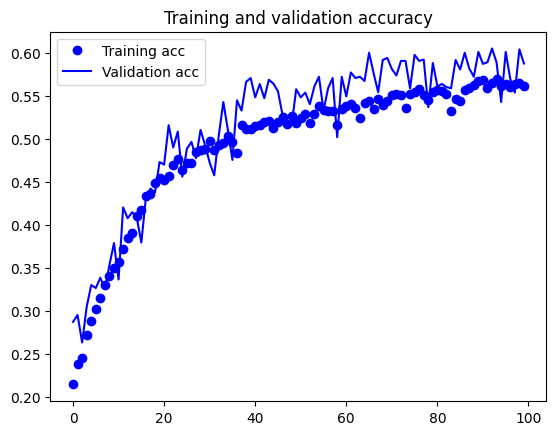

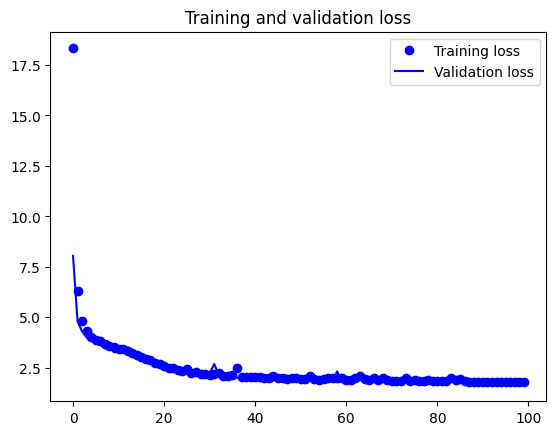

In [22]:
acc = history20.history['acc']
val_acc = history20.history['val_acc']
loss = history20.history['loss']
val_loss = history20.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 9: Reduced L2 Regularizer layers

L2 Regularizers but with one lesser layers

In [11]:
wrmodel3 = models.Sequential()
wrmodel3.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001),activation='relu',
                        input_shape=(img_size, img_size, 3)))
wrmodel3.add(BatchNormalization(momentum=0.8)) 
wrmodel3.add(layers.MaxPooling2D((2, 2)))

wrmodel3.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu')) 
wrmodel3.add(BatchNormalization(momentum=0.8))
wrmodel3.add(layers.MaxPooling2D((2, 2)))

wrmodel3.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu')) 
wrmodel3.add(BatchNormalization(momentum=0.8))
wrmodel3.add(layers.MaxPooling2D((2, 2)))

wrmodel3.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu')) 
wrmodel3.add(BatchNormalization(momentum=0.8))
wrmodel3.add(layers.Conv2D(512, (3, 3), activation='relu')) 
wrmodel3.add(BatchNormalization(momentum=0.8))
wrmodel3.add(layers.MaxPooling2D((2, 2)))

wrmodel3.add(layers.Flatten())
wrmodel3.add(layers.Dropout(0.5)) 

wrmodel3.add(layers.Dense(512, activation='relu'))
wrmodel3.add(BatchNormalization(momentum=0.8))
wrmodel3.add(layers.Dropout(0.5))  

wrmodel3.add(layers.Dense(10, activation='softmax'))

wrmodel3.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                        

In [12]:
wrmodel3.compile(loss='categorical_crossentropy',
              optimizer='adam', # adam optimizer with default learning rate
              metrics=['acc'])

In [13]:
history21 = wrmodel3.fit(
      train_generator_32,
      steps_per_epoch=234, #train_sample_size/data_batch_size
      epochs=100,
      validation_data=validation_generator_32,
      validation_steps=63)

Epoch 1/100
234/234 [==============================] - 52s 180ms/step - loss: 3.0689 - acc: 0.2167 - val_loss: 2.2288 - val_acc: 0.3403
Epoch 2/100
234/234 [==============================] - 37s 156ms/step - loss: 2.4834 - acc: 0.2980 - val_loss: 2.0593 - val_acc: 0.3807
Epoch 3/100
234/234 [==============================] - 35s 148ms/step - loss: 2.2220 - acc: 0.3503 - val_loss: 1.9783 - val_acc: 0.4345
Epoch 4/100
234/234 [==============================] - 36s 155ms/step - loss: 2.0465 - acc: 0.3904 - val_loss: 1.9875 - val_acc: 0.4141
Epoch 5/100
234/234 [==============================] - 35s 150ms/step - loss: 1.9327 - acc: 0.4151 - val_loss: 1.7218 - val_acc: 0.4768
Epoch 6/100
234/234 [==============================] - 36s 152ms/step - loss: 1.8215 - acc: 0.4423 - val_loss: 1.7470 - val_acc: 0.4709
Epoch 7/100
234/234 [==============================] - 35s 149ms/step - loss: 1.7270 - acc: 0.4663 - val_loss: 1.6405 - val_acc: 0.5027
Epoch 8/100
234/234 [===========================

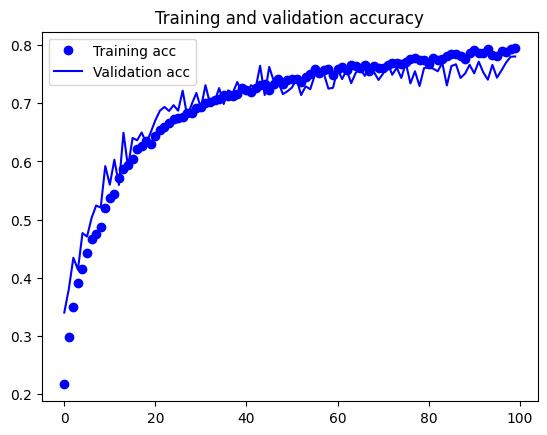

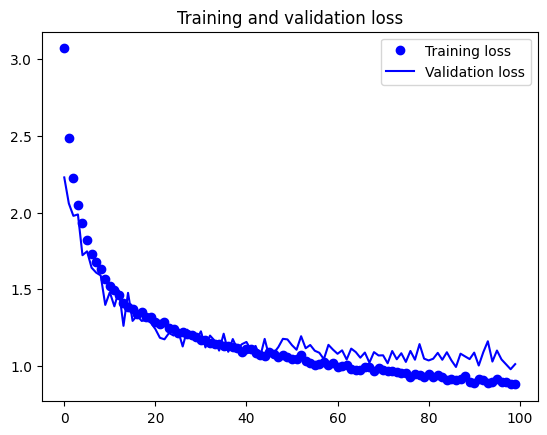

In [14]:
acc = history21.history['acc']
val_acc = history21.history['val_acc']
loss = history21.history['loss']
val_loss = history21.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Additional Testing using Model 6.2 cut at 55 epochs

Trying the loss function Sparse Categorical Crossentropy instead of Categorical Crossentropy. Spare Categorical Crossentropy just helps reduce computation resources

In [20]:
img_size = 150
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator_32 = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='sparse')  # class mode to sparse

validation_generator_32 = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='sparse')


test_generator_32 = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='sparse')

Found 7502 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.
Found 502 images belonging to 10 classes.


In [12]:
for data_batch, labels_batch in train_generator_32:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [13]:
sparsemodel = models.Sequential()
sparsemodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
sparsemodel.add(BatchNormalization(momentum=0.8)) 
sparsemodel.add(layers.MaxPooling2D((2, 2)))

sparsemodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
sparsemodel.add(BatchNormalization(momentum=0.8))
sparsemodel.add(layers.MaxPooling2D((2, 2)))

sparsemodel.add(layers.Conv2D(128, (3, 3), activation='relu')) 
sparsemodel.add(BatchNormalization(momentum=0.8))
sparsemodel.add(layers.MaxPooling2D((2, 2)))

sparsemodel.add(layers.Conv2D(256, (3, 3), activation='relu')) 
sparsemodel.add(BatchNormalization(momentum=0.8))
sparsemodel.add(layers.Conv2D(512, (3, 3), activation='relu')) 
sparsemodel.add(BatchNormalization(momentum=0.8))
sparsemodel.add(layers.MaxPooling2D((2, 2)))

sparsemodel.add(layers.Flatten())
sparsemodel.add(layers.Dropout(0.5))

sparsemodel.add(layers.Dense(512, activation='relu'))
sparsemodel.add(BatchNormalization(momentum=0.8))
sparsemodel.add(layers.Dropout(0.5))  

sparsemodel.add(layers.Dense(10, activation='softmax'))

In [14]:
sparsemodel.compile(loss='sparse_categorical_crossentropy', # changed loss to sparse_categorical_crossentropy
              optimizer='adam',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]) # changed metrics to sparse_categorical_accuracy

In [15]:
historyex1 = sparsemodel.fit(
      train_generator_32,
      steps_per_epoch=234,
      epochs=55, # loss started to increase after around 55 epochs
      validation_data=validation_generator_32,
      validation_steps=63)

Epoch 1/55
234/234 [==============================] - 52s 184ms/step - loss: 2.7079 - accuracy: 0.2161 - val_loss: 1.8759 - val_accuracy: 0.3538
Epoch 2/55
234/234 [==============================] - 45s 194ms/step - loss: 2.1778 - accuracy: 0.2940 - val_loss: 1.8442 - val_accuracy: 0.3777
Epoch 3/55
234/234 [==============================] - 47s 202ms/step - loss: 1.9766 - accuracy: 0.3379 - val_loss: 1.9199 - val_accuracy: 0.3607
Epoch 4/55
234/234 [==============================] - 51s 218ms/step - loss: 1.7799 - accuracy: 0.3969 - val_loss: 1.7999 - val_accuracy: 0.4031
Epoch 5/55
234/234 [==============================] - 48s 203ms/step - loss: 1.6579 - accuracy: 0.4363 - val_loss: 1.6606 - val_accuracy: 0.4420
Epoch 6/55
234/234 [==============================] - 47s 200ms/step - loss: 1.5479 - accuracy: 0.4740 - val_loss: 1.6068 - val_accuracy: 0.4444
Epoch 7/55
234/234 [==============================] - 44s 187ms/step - loss: 1.4779 - accuracy: 0.4885 - val_loss: 1.3828 - val_ac

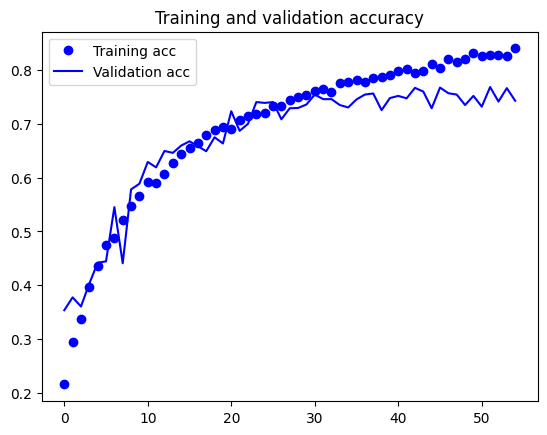

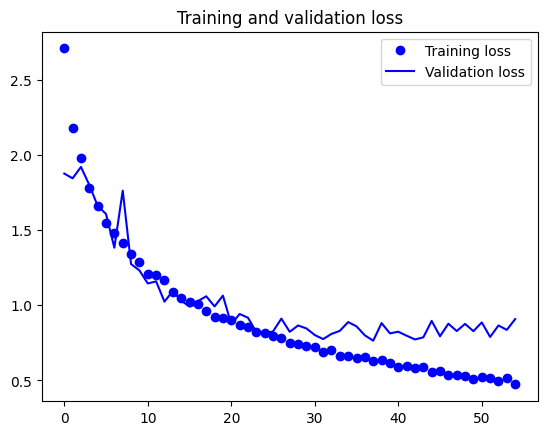

In [16]:
acc = historyex1.history['accuracy']
val_acc = historyex1.history['val_accuracy']
loss = historyex1.history['loss']
val_loss = historyex1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Save the Model
sparsemodel.save('scratch_food_model.h5')

#### SpatialDropout2D

In [20]:
spatialmodel = models.Sequential()
spatialmodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
spatialmodel.add(BatchNormalization(momentum=0.8)) 
spatialmodel.add(layers.MaxPooling2D((2, 2)))
spatialmodel.add(layers.SpatialDropout2D(0.25)) # removed dropout, added spatialdropout 

spatialmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) 
spatialmodel.add(BatchNormalization(momentum=0.8))
spatialmodel.add(layers.MaxPooling2D((2, 2)))
spatialmodel.add(layers.SpatialDropout2D(0.25))

spatialmodel.add(layers.Conv2D(128, (3, 3), activation='relu')) 
spatialmodel.add(BatchNormalization(momentum=0.8))
spatialmodel.add(layers.MaxPooling2D((2, 2)))
spatialmodel.add(layers.SpatialDropout2D(0.25)) 

spatialmodel.add(layers.Conv2D(256, (3, 3), activation='relu')) 
spatialmodel.add(BatchNormalization(momentum=0.8))
spatialmodel.add(layers.Conv2D(512, (3, 3), activation='relu')) 
spatialmodel.add(BatchNormalization(momentum=0.8))
spatialmodel.add(layers.MaxPooling2D((2, 2)))

spatialmodel.add(layers.Flatten())

spatialmodel.add(layers.Dense(512, activation='relu'))
spatialmodel.add(BatchNormalization(momentum=0.8)) 

spatialmodel.add(layers.Dense(10, activation='softmax'))

In [21]:
spatialmodel.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [22]:
historyex2 = spatialmodel.fit(
      train_generator_32,
      steps_per_epoch=234,
      epochs=55, # loss started to increase after around 55 epochs
      validation_data=validation_generator_32,
      validation_steps=63)

Epoch 1/55
234/234 [==============================] - 36s 148ms/step - loss: 2.2997 - accuracy: 0.2270 - val_loss: 1.9521 - val_accuracy: 0.3174
Epoch 2/55
234/234 [==============================] - 35s 149ms/step - loss: 2.0407 - accuracy: 0.2905 - val_loss: 1.9053 - val_accuracy: 0.3209
Epoch 3/55
234/234 [==============================] - 34s 145ms/step - loss: 1.9616 - accuracy: 0.3102 - val_loss: 1.7664 - val_accuracy: 0.3827
Epoch 4/55
234/234 [==============================] - 34s 144ms/step - loss: 1.9043 - accuracy: 0.3383 - val_loss: 1.6775 - val_accuracy: 0.4086
Epoch 5/55
234/234 [==============================] - 34s 146ms/step - loss: 1.8489 - accuracy: 0.3499 - val_loss: 1.6911 - val_accuracy: 0.4300
Epoch 6/55
234/234 [==============================] - 35s 151ms/step - loss: 1.8079 - accuracy: 0.3734 - val_loss: 1.5868 - val_accuracy: 0.4554
Epoch 7/55
234/234 [==============================] - 38s 163ms/step - loss: 1.7677 - accuracy: 0.3801 - val_loss: 1.5815 - val_ac

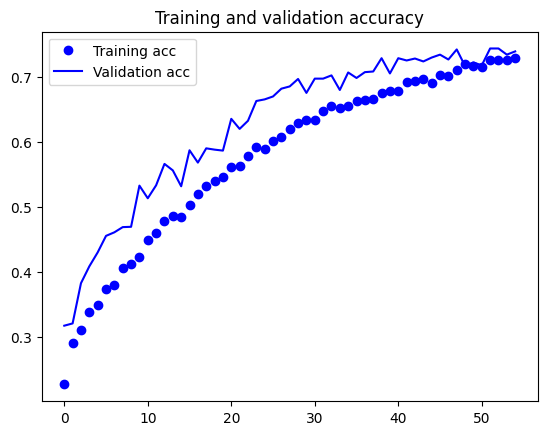

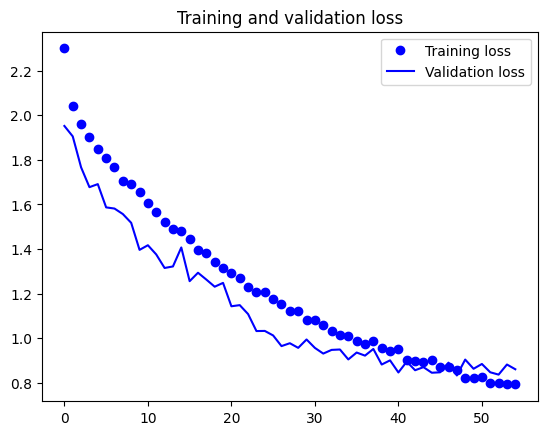

In [24]:
acc = historyex2.history['accuracy']
val_acc = historyex2.history['val_accuracy']
loss = historyex2.history['loss']
val_loss = historyex2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
historyex3 = spatialmodel.fit(
      train_generator_32,
      steps_per_epoch=234,
      epochs=45, # run for another 45 epochs
      validation_data=validation_generator_32,
      validation_steps=63)

Epoch 1/45
234/234 [==============================] - 37s 158ms/step - loss: 0.7767 - accuracy: 0.7311 - val_loss: 0.8637 - val_accuracy: 0.7289
Epoch 2/45
234/234 [==============================] - 36s 155ms/step - loss: 0.7766 - accuracy: 0.7344 - val_loss: 0.8717 - val_accuracy: 0.7339
Epoch 3/45
234/234 [==============================] - 38s 163ms/step - loss: 0.7591 - accuracy: 0.7400 - val_loss: 0.8372 - val_accuracy: 0.7404
Epoch 4/45
234/234 [==============================] - 47s 201ms/step - loss: 0.7365 - accuracy: 0.7454 - val_loss: 0.8203 - val_accuracy: 0.7464
Epoch 5/45
234/234 [==============================] - 50s 213ms/step - loss: 0.7669 - accuracy: 0.7335 - val_loss: 0.8901 - val_accuracy: 0.7270
Epoch 6/45
234/234 [==============================] - 49s 207ms/step - loss: 0.7781 - accuracy: 0.7324 - val_loss: 0.8508 - val_accuracy: 0.7439
Epoch 7/45
234/234 [==============================] - 49s 209ms/step - loss: 0.7343 - accuracy: 0.7509 - val_loss: 0.8432 - val_ac

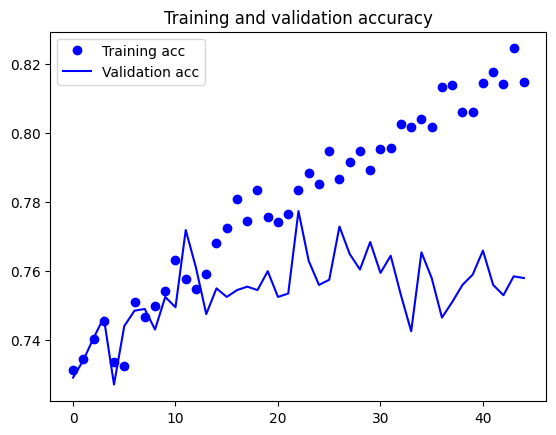

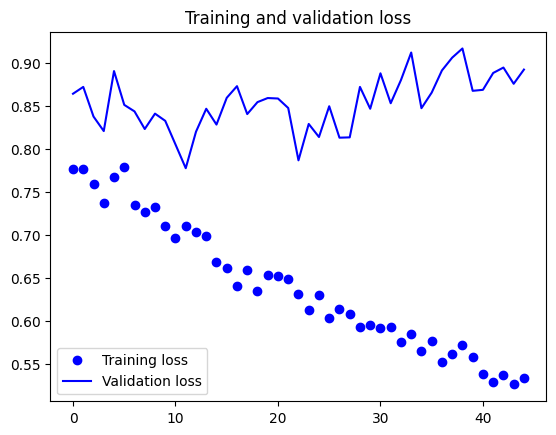

In [29]:
acc = historyex3.history['accuracy']
val_acc = historyex3.history['val_accuracy']
loss = historyex3.history['loss']
val_loss = historyex3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Pretrained Model 

### InceptionV3

In [11]:
from tensorflow.keras.applications import InceptionV3
img_size = 150

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [5]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

Final feature map is (3,3,2048)

#### Feature Extraction without Data Augmentation

In [5]:
base_dir = 'C:\\Users\\marke\\DEEP LEARNING\\Assignment 1\\'

#train_dir = 'C:\\Users\\marke\\DEEP LEARNING\\Assignment 1\\train'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
from keras.applications.inception_v3 import preprocess_input

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 3, 2048)) # changed shape to 3,3,2048 according to InceptionV3 final feature map
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='sparse')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7502)
validation_features, validation_labels = extract_features(validation_dir, 2007)
test_features, test_labels = extract_features(test_dir, 502)

Found 7502 images belonging to 10 classes.
1/1 [==============================] - 0s 231ms/step
Found 2007 images belonging to 10 classes.
1/1 [==============================] - 0s 236ms/step
Found 502 images belonging to 10 classes.
1/1 [==============================] - 0s 23ms/step


In [7]:
train_features = np.reshape(train_features, (7502, 3*3*2048))
validation_features = np.reshape(validation_features, (2007, 3*3*2048))
test_features = np.reshape(test_features, (502, 3*3*2048))

In [12]:
# Build the Model
inception_model = models.Sequential()
inception_model.add(layers.Dense(256, activation='relu', input_dim=3*3*2048))
#inception_model.add(layers.Dropout(0.5))
inception_model.add(layers.Dense(10, activation='softmax'))

inception_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               4718848   
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 4,721,418
Trainable params: 4,721,418
Non-trainable params: 0
_________________________________________________________________


In [13]:
inception_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = inception_model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
376/376 [==============================] - 3s 6ms/step - loss: 2.8085 - accuracy: 0.4224 - val_loss: 1.4121 - val_accuracy: 0.5336
Epoch 2/30
376/376 [==============================] - 2s 5ms/step - loss: 1.1805 - accuracy: 0.6149 - val_loss: 1.3660 - val_accuracy: 0.5710
Epoch 3/30
376/376 [==============================] - 2s 5ms/step - loss: 0.9178 - accuracy: 0.6973 - val_loss: 1.1827 - val_accuracy: 0.6193
Epoch 4/30
376/376 [==============================] - 2s 4ms/step - loss: 0.7836 - accuracy: 0.7353 - val_loss: 1.3666 - val_accuracy: 0.5840
Epoch 5/30
376/376 [==============================] - 2s 4ms/step - loss: 0.6885 - accuracy: 0.7665 - val_loss: 1.2818 - val_accuracy: 0.6109
Epoch 6/30
376/376 [==============================] - 1s 4ms/step - loss: 0.5853 - accuracy: 0.7991 - val_loss: 1.2819 - val_accuracy: 0.6248
Epoch 7/30
376/376 [==============================] - 1s 4ms/step - loss: 0.5210 - accuracy: 0.8211 - val_loss: 1.5559 - val_accuracy: 0.5969
Epoch 

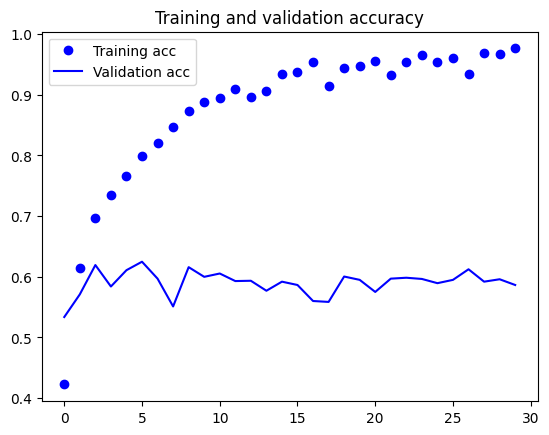

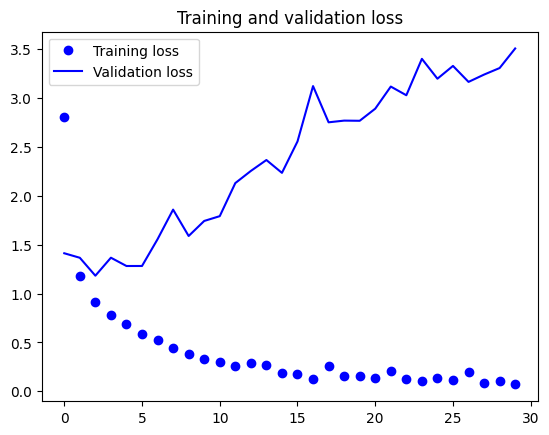

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Here we can see clear overfitting even from the start. Our validation accuracy is hovering around 0.6. We can try data augmentation next to reduce the overfitting

#### Feature Extraction with Data Augmentation

In [15]:
inception_model = models.Sequential()
inception_model.add(conv_base)
inception_model.add(layers.Flatten())
inception_model.add(layers.Dense(256, activation='relu'))
inception_model.add(layers.Dense(10, activation='softmax'))

In [16]:
inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 26,489,770
Non-trainable params: 34,432
_________________________________________________________________


In [17]:
conv_base.trainable = False

In [18]:
inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 4,721,418
Non-trainable params: 21,802,784
_________________________________________________________________


In [7]:

img_size = 150

train_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7502 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.


In [20]:
inception_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
history = inception_model.fit(
      train_generator,
      steps_per_epoch=7502//20,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//20,
      verbose=1)

Epoch 1/30
375/375 [==============================] - 43s 107ms/step - loss: 2.4672 - accuracy: 0.4821 - val_loss: 1.6415 - val_accuracy: 0.4785
Epoch 2/30
375/375 [==============================] - 35s 92ms/step - loss: 1.3282 - accuracy: 0.5632 - val_loss: 1.2616 - val_accuracy: 0.5785
Epoch 3/30
375/375 [==============================] - 36s 97ms/step - loss: 1.1952 - accuracy: 0.6123 - val_loss: 1.1011 - val_accuracy: 0.6460
Epoch 4/30
375/375 [==============================] - 37s 99ms/step - loss: 1.1242 - accuracy: 0.6302 - val_loss: 1.0219 - val_accuracy: 0.6735
Epoch 5/30
375/375 [==============================] - 38s 100ms/step - loss: 1.0783 - accuracy: 0.6427 - val_loss: 1.0706 - val_accuracy: 0.6580
Epoch 6/30
375/375 [==============================] - 41s 110ms/step - loss: 1.0328 - accuracy: 0.6599 - val_loss: 1.0267 - val_accuracy: 0.6650
Epoch 7/30
375/375 [==============================] - 40s 106ms/step - loss: 1.0138 - accuracy: 0.6628 - val_loss: 1.0442 - val_accur

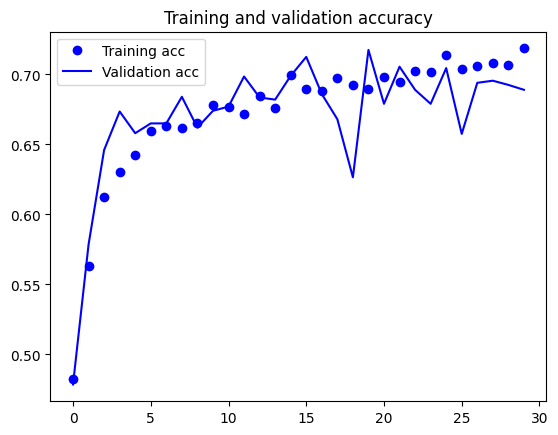

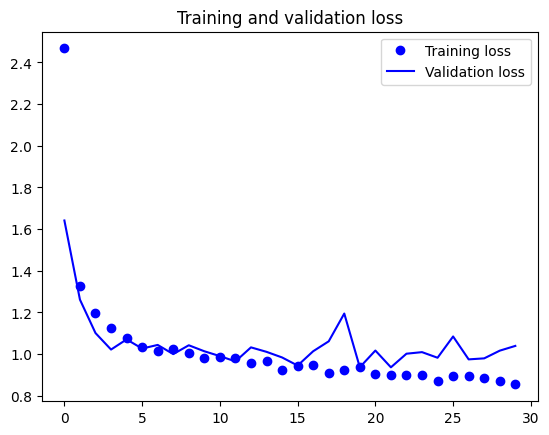

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Validation accuracy has improved until around 0.68 but training accuracy has dropped

#### Fine Tuning

In [24]:
conv_base.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [26]:
inception_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 4,721,418
Non-trainable params: 21,802,784
_________________________________________________________________


In [27]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [28]:
inception_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 10,794,954
Non-trainable params: 15,729,248
_________________________________________________________________


In [31]:
inception_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001/2),
              metrics=['accuracy'])

In [32]:
history = inception_model.fit(
      train_generator,
      steps_per_epoch=7502//20,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//20,
      verbose=1)

Epoch 1/30
375/375 [==============================] - 41s 98ms/step - loss: 1.1227 - accuracy: 0.6369 - val_loss: 0.9423 - val_accuracy: 0.7200
Epoch 2/30
375/375 [==============================] - 36s 97ms/step - loss: 0.9154 - accuracy: 0.6955 - val_loss: 0.8773 - val_accuracy: 0.7315
Epoch 3/30
375/375 [==============================] - 37s 98ms/step - loss: 0.8174 - accuracy: 0.7296 - val_loss: 0.8277 - val_accuracy: 0.7445
Epoch 4/30
375/375 [==============================] - 37s 99ms/step - loss: 0.7458 - accuracy: 0.7529 - val_loss: 0.8699 - val_accuracy: 0.7355
Epoch 5/30
375/375 [==============================] - 37s 100ms/step - loss: 0.7209 - accuracy: 0.7646 - val_loss: 0.8652 - val_accuracy: 0.7385
Epoch 6/30
375/375 [==============================] - 38s 101ms/step - loss: 0.6645 - accuracy: 0.7787 - val_loss: 0.9350 - val_accuracy: 0.7175
Epoch 7/30
375/375 [==============================] - 39s 105ms/step - loss: 0.6271 - accuracy: 0.7964 - val_loss: 0.8624 - val_accura

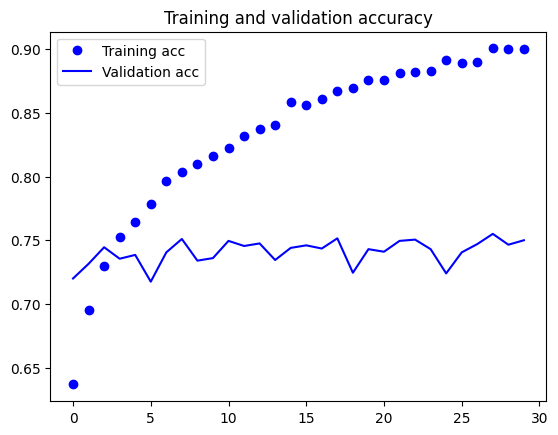

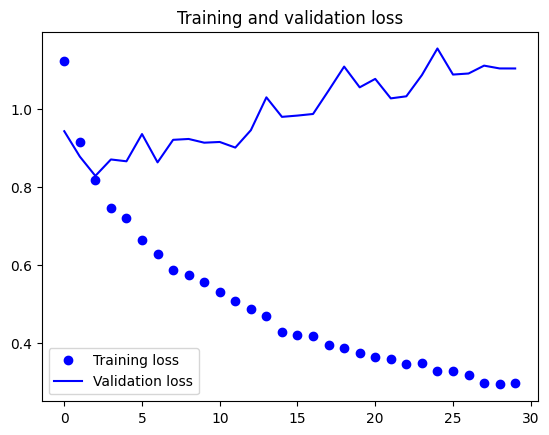

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As the model is overfitted, we can try more regularisation techniques such as dropout layers

#### Adding Dropout Layer

In [ ]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [14]:
inception_model = models.Sequential()
inception_model.add(conv_base)
inception_model.add(layers.Flatten())
inception_model.add(layers.Dense(256, activation='relu'))
inception_model.add(layers.Dropout(0.5))
inception_model.add(layers.Dense(10, activation='softmax'))

In [15]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [16]:
inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               4718848   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 10,794,954
Non-trainable params: 15,729,248
_________________________________________________________________


In [17]:
inception_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001/2),
              metrics=['accuracy'])

In [18]:
history = inception_model.fit(
      train_generator,
      steps_per_epoch=7502//20,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//20,
      verbose=1)

Epoch 1/30
375/375 [==============================] - 52s 114ms/step - loss: 1.6597 - accuracy: 0.4759 - val_loss: 1.0607 - val_accuracy: 0.6880
Epoch 2/30
375/375 [==============================] - 38s 102ms/step - loss: 1.3121 - accuracy: 0.5861 - val_loss: 0.9474 - val_accuracy: 0.7215
Epoch 3/30
375/375 [==============================] - 50s 133ms/step - loss: 1.1998 - accuracy: 0.6230 - val_loss: 0.9158 - val_accuracy: 0.7125
Epoch 4/30
375/375 [==============================] - 38s 100ms/step - loss: 1.1328 - accuracy: 0.6489 - val_loss: 0.9189 - val_accuracy: 0.7380
Epoch 5/30
375/375 [==============================] - 38s 100ms/step - loss: 1.0559 - accuracy: 0.6693 - val_loss: 0.9873 - val_accuracy: 0.7200
Epoch 6/30
375/375 [==============================] - 37s 97ms/step - loss: 1.0203 - accuracy: 0.6818 - val_loss: 0.8910 - val_accuracy: 0.7385
Epoch 7/30
375/375 [==============================] - 38s 101ms/step - loss: 0.9801 - accuracy: 0.6927 - val_loss: 0.8922 - val_acc

In [36]:
inception_model.save('inception_food_model.h5')

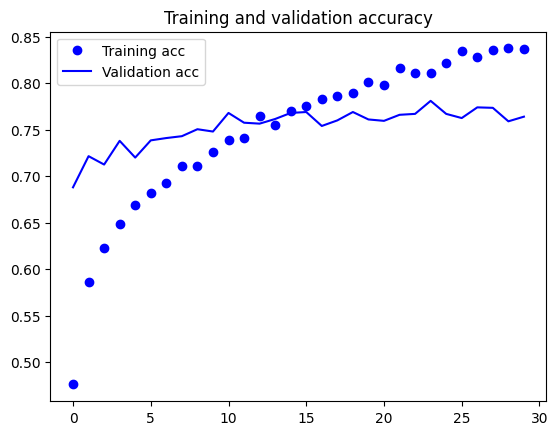

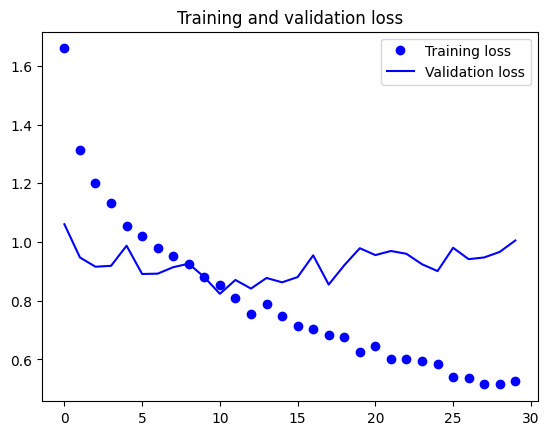

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The validation accuracy is now hovering around 0.76 which is slightly better than the previous model. The model is starting to overfit at the last 10 epochs as seen from the increase in loss. Another method we can use is GlobalPoolingAverage layer

#### Tried with GlobalPoolingAverage

In [29]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [30]:
inception_model2 = models.Sequential()
inception_model2.add(conv_base)
inception_model2.add(tf.keras.layers.GlobalAveragePooling2D()) # replaces the Flatten layer
inception_model2.add(layers.Dense(10, activation='softmax'))

In [31]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [32]:
inception_model2.summary() # as there is no need for the 256 nnode dense layer, the number of training parameters is reduced

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 10)                20490     
                                                                 
Total params: 21,823,274
Trainable params: 6,094,026
Non-trainable params: 15,729,248
_________________________________________________________________


In [33]:
inception_model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001/2),
              metrics=['accuracy'])

In [34]:
history = inception_model2.fit(
      train_generator,
      steps_per_epoch=7502//20,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//20,
      verbose=1)

Epoch 1/30
375/375 [==============================] - 41s 101ms/step - loss: 1.1612 - accuracy: 0.6264 - val_loss: 0.8823 - val_accuracy: 0.7340
Epoch 2/30
375/375 [==============================] - 38s 102ms/step - loss: 0.8693 - accuracy: 0.7125 - val_loss: 0.9051 - val_accuracy: 0.7300
Epoch 3/30
375/375 [==============================] - 39s 103ms/step - loss: 0.7541 - accuracy: 0.7522 - val_loss: 0.8154 - val_accuracy: 0.7500
Epoch 4/30
375/375 [==============================] - 40s 106ms/step - loss: 0.6872 - accuracy: 0.7662 - val_loss: 0.8778 - val_accuracy: 0.7295
Epoch 5/30
375/375 [==============================] - 44s 116ms/step - loss: 0.6457 - accuracy: 0.7819 - val_loss: 0.8747 - val_accuracy: 0.7305
Epoch 6/30
375/375 [==============================] - 46s 122ms/step - loss: 0.5992 - accuracy: 0.8009 - val_loss: 0.9174 - val_accuracy: 0.7300
Epoch 7/30
375/375 [==============================] - 40s 107ms/step - loss: 0.5598 - accuracy: 0.8117 - val_loss: 0.8237 - val_ac

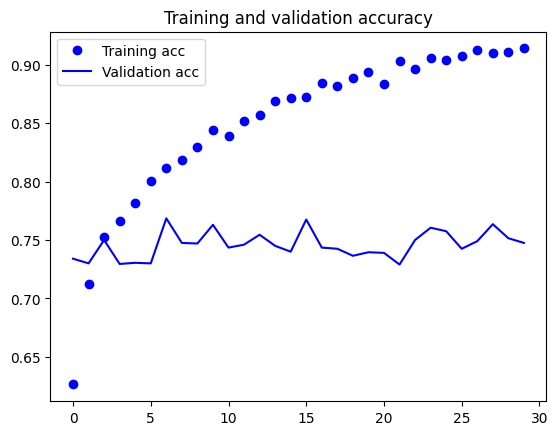

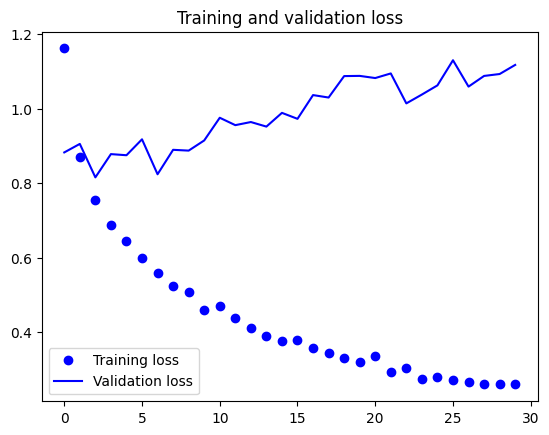

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

GlobalAveragePooling did very little to stop overfitting. We will use the model with dropout layers instead

#### Trying out different batch sizes

We can try different batch sizes as well 10 and 32

#### Batch size 10

In [83]:
# Here, we reduce batch size to 10

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='sparse')

Found 7502 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.


In [84]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [85]:
inception_model = models.Sequential()
inception_model.add(conv_base)
inception_model.add(layers.Flatten())
inception_model.add(layers.Dense(256, activation='relu'))
inception_model.add(layers.Dropout(0.5))
inception_model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


inception_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_13 (Dense)            (None, 256)               4718848   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 10,794,954
Non-trainable params: 15,729,248
_________________________________________________________________


In [86]:
inception_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001/2),
              metrics=['accuracy'])

In [87]:
history = inception_model.fit(
      train_generator,
      steps_per_epoch=7502//10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//10,
      verbose=1)

Epoch 1/30
750/750 [==============================] - 48s 59ms/step - loss: 1.8265 - accuracy: 0.4060 - val_loss: 1.1496 - val_accuracy: 0.6480
Epoch 2/30
750/750 [==============================] - 41s 54ms/step - loss: 1.5207 - accuracy: 0.5055 - val_loss: 1.0310 - val_accuracy: 0.6905
Epoch 3/30
750/750 [==============================] - 41s 55ms/step - loss: 1.3819 - accuracy: 0.5541 - val_loss: 0.9959 - val_accuracy: 0.6940
Epoch 4/30
750/750 [==============================] - 41s 54ms/step - loss: 1.2982 - accuracy: 0.5928 - val_loss: 0.9513 - val_accuracy: 0.7300
Epoch 5/30
750/750 [==============================] - 48s 63ms/step - loss: 1.1987 - accuracy: 0.6151 - val_loss: 0.9015 - val_accuracy: 0.7330
Epoch 6/30
750/750 [==============================] - 48s 64ms/step - loss: 1.1405 - accuracy: 0.6405 - val_loss: 0.9011 - val_accuracy: 0.7415
Epoch 7/30
750/750 [==============================] - 49s 65ms/step - loss: 1.1079 - accuracy: 0.6560 - val_loss: 0.8814 - val_accuracy:

750/750 [==============================] - 48s 59ms/step - loss: 1.8265 - accuracy: 0.4060 - val_loss: 1.1496 - val_accuracy: 0.6480
Epoch 2/30
750/750 [==============================] - 41s 54ms/step - loss: 1.5207 - accuracy: 0.5055 - val_loss: 1.0310 - val_accuracy: 0.6905
Epoch 3/30
750/750 [==============================] - 41s 55ms/step - loss: 1.3819 - accuracy: 0.5541 - val_loss: 0.9959 - val_accuracy: 0.6940
Epoch 4/30
750/750 [==============================] - 41s 54ms/step - loss: 1.2982 - accuracy: 0.5928 - val_loss: 0.9513 - val_accuracy: 0.7300
Epoch 5/30
750/750 [==============================] - 48s 63ms/step - loss: 1.1987 - accuracy: 0.6151 - val_loss: 0.9015 - val_accuracy: 0.7330
Epoch 6/30
750/750 [==============================] - 48s 64ms/step - loss: 1.1405 - accuracy: 0.6405 - val_loss: 0.9011 - val_accuracy: 0.7415
Epoch 7/30
750/750 [==============================] - 49s 65ms/step - loss: 1.1079 - accuracy: 0.6560 - val_loss: 0.8814 - val_accuracy: 0.7520
Epo

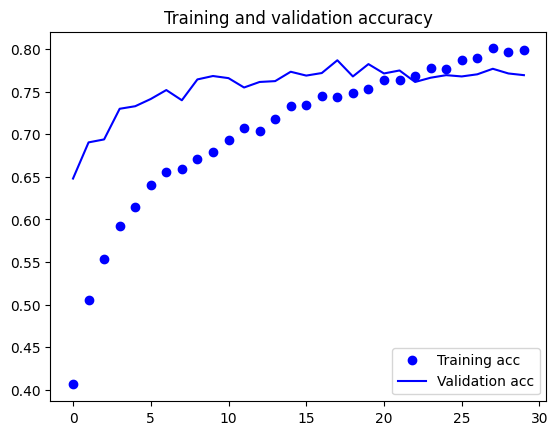

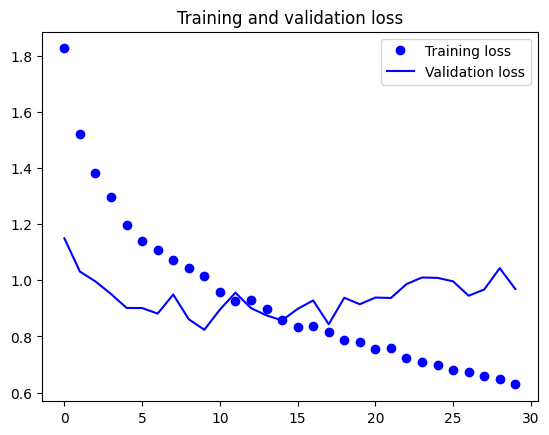

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Batch size 32

In [89]:

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='sparse')

Found 7502 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.


In [90]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [92]:
inception_model = models.Sequential()
inception_model.add(conv_base)
inception_model.add(layers.Flatten())
inception_model.add(layers.Dense(256, activation='relu'))
inception_model.add(layers.Dropout(0.5))
inception_model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [93]:
inception_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001/2),
              metrics=['accuracy'])

In [94]:
history = inception_model.fit(
      train_generator,
      steps_per_epoch=7502//32,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//32,
      verbose=1)

Epoch 1/30
234/234 [==============================] - 41s 162ms/step - loss: 1.6099 - accuracy: 0.5116 - val_loss: 1.0068 - val_accuracy: 0.6890
Epoch 2/30
234/234 [==============================] - 38s 163ms/step - loss: 1.2693 - accuracy: 0.6067 - val_loss: 0.9976 - val_accuracy: 0.7102
Epoch 3/30
234/234 [==============================] - 39s 166ms/step - loss: 1.1062 - accuracy: 0.6600 - val_loss: 1.0035 - val_accuracy: 0.7177
Epoch 4/30
234/234 [==============================] - 38s 163ms/step - loss: 1.0276 - accuracy: 0.6747 - val_loss: 0.8775 - val_accuracy: 0.7475
Epoch 5/30
234/234 [==============================] - 43s 183ms/step - loss: 0.9832 - accuracy: 0.6906 - val_loss: 0.8539 - val_accuracy: 0.7510
Epoch 6/30
234/234 [==============================] - 38s 161ms/step - loss: 0.9231 - accuracy: 0.7096 - val_loss: 0.8999 - val_accuracy: 0.7495
Epoch 7/30
234/234 [==============================] - 40s 171ms/step - loss: 0.8837 - accuracy: 0.7252 - val_loss: 0.8366 - val_ac

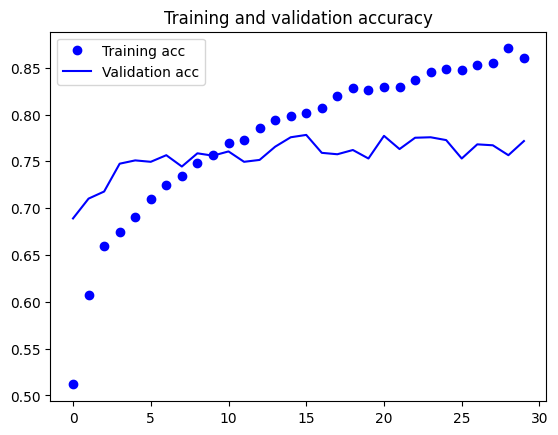

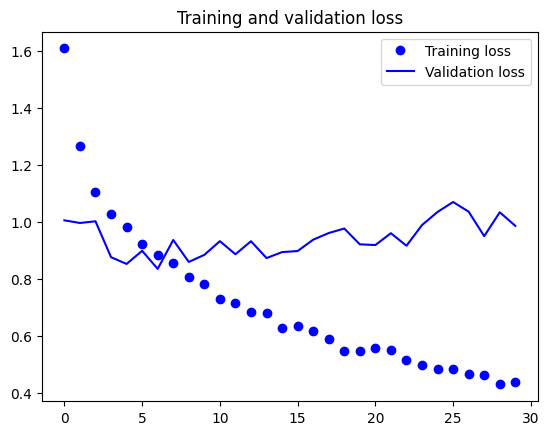

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Neither decreasing nor increasing the batch size seemed to improve model performance. Decreasing batch sized just resulted in overfitting in later on while increasing batch size resulted in overfitting earlier. Accuracy is still around 0.76. I will use batch size 10 as overfitting is slightly reduced

#### Learning Rate

We can adjust the learning rates to see if we can improve the accuracy

#### Learning Rate 0.001

In [97]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='sparse')

Found 7502 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.


In [98]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [99]:
inception_model = models.Sequential()
inception_model.add(conv_base)
inception_model.add(layers.Flatten())
inception_model.add(layers.Dense(256, activation='relu'))
inception_model.add(layers.Dropout(0.5))
inception_model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [100]:
inception_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # increased the learning rate back to default
              metrics=['accuracy'])

In [101]:
history = inception_model.fit(
      train_generator,
      steps_per_epoch=7502//10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//10,
      verbose=1)

Epoch 1/30
750/750 [==============================] - 46s 56ms/step - loss: 1.9899 - accuracy: 0.3693 - val_loss: 1.2594 - val_accuracy: 0.6345
Epoch 2/30
750/750 [==============================] - 46s 62ms/step - loss: 1.6423 - accuracy: 0.4478 - val_loss: 1.3503 - val_accuracy: 0.6435
Epoch 3/30
750/750 [==============================] - 42s 56ms/step - loss: 1.5291 - accuracy: 0.4860 - val_loss: 1.0560 - val_accuracy: 0.6845
Epoch 4/30
750/750 [==============================] - 41s 54ms/step - loss: 1.4046 - accuracy: 0.5352 - val_loss: 0.9607 - val_accuracy: 0.7090
Epoch 5/30
750/750 [==============================] - 41s 54ms/step - loss: 1.3677 - accuracy: 0.5473 - val_loss: 0.8933 - val_accuracy: 0.7285
Epoch 6/30
750/750 [==============================] - 41s 54ms/step - loss: 1.3093 - accuracy: 0.5702 - val_loss: 0.9335 - val_accuracy: 0.7375
Epoch 7/30
750/750 [==============================] - 41s 54ms/step - loss: 1.2676 - accuracy: 0.5882 - val_loss: 0.9379 - val_accuracy:

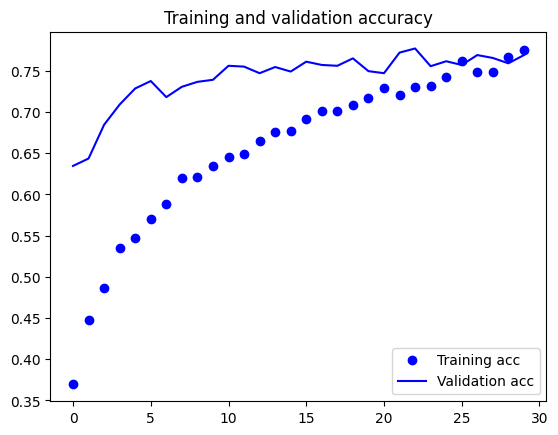

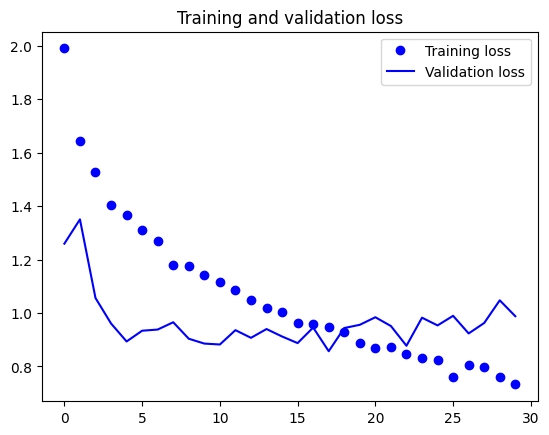

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Learning Rate 0.001/4

In [103]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [104]:
inception_model = models.Sequential()
inception_model.add(conv_base)
inception_model.add(layers.Flatten())
inception_model.add(layers.Dense(256, activation='relu'))
inception_model.add(layers.Dropout(0.5))
inception_model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [105]:
inception_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001/4), # decreased the learning rate from 0.001/2 to 0.001/4
              metrics=['accuracy'])

In [106]:
history = inception_model.fit(
      train_generator,
      steps_per_epoch=7502//10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//10,
      verbose=1)

Epoch 1/30
750/750 [==============================] - 46s 57ms/step - loss: 1.6544 - accuracy: 0.4633 - val_loss: 0.9670 - val_accuracy: 0.7050
Epoch 2/30
750/750 [==============================] - 39s 52ms/step - loss: 1.3286 - accuracy: 0.5792 - val_loss: 1.0347 - val_accuracy: 0.6990
Epoch 3/30
750/750 [==============================] - 41s 55ms/step - loss: 1.2483 - accuracy: 0.6095 - val_loss: 0.8835 - val_accuracy: 0.7345
Epoch 4/30
750/750 [==============================] - 39s 52ms/step - loss: 1.1616 - accuracy: 0.6380 - val_loss: 0.8712 - val_accuracy: 0.7435
Epoch 5/30
750/750 [==============================] - 41s 54ms/step - loss: 1.1179 - accuracy: 0.6504 - val_loss: 0.9137 - val_accuracy: 0.7395
Epoch 6/30
750/750 [==============================] - 41s 54ms/step - loss: 1.0670 - accuracy: 0.6666 - val_loss: 0.8497 - val_accuracy: 0.7555
Epoch 7/30
750/750 [==============================] - 43s 57ms/step - loss: 1.0244 - accuracy: 0.6811 - val_loss: 0.8353 - val_accuracy:

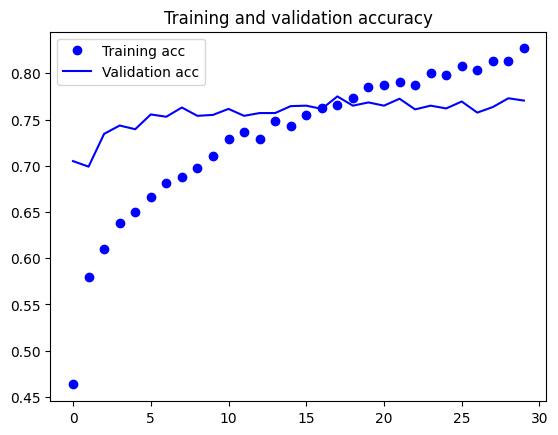

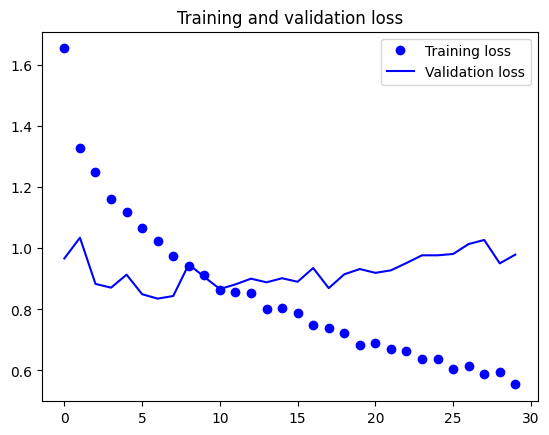

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Different Optimizers

We can try different optimizers such as RMSProp to see if that affects anything

In [ ]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [108]:
inception_model = models.Sequential()
inception_model.add(conv_base)
inception_model.add(layers.Flatten())
inception_model.add(layers.Dense(256, activation='relu'))
inception_model.add(layers.Dropout(0.5))
inception_model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [109]:
inception_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001/2), # changed optimizer to RMSprop
              metrics=['accuracy'])

In [110]:
history = inception_model.fit(
      train_generator,
      steps_per_epoch=7502//10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//10,
      verbose=1)

Epoch 1/30
750/750 [==============================] - 44s 54ms/step - loss: 1.0438 - accuracy: 0.7274 - val_loss: 1.4597 - val_accuracy: 0.7495
Epoch 2/30
750/750 [==============================] - 43s 57ms/step - loss: 0.9378 - accuracy: 0.7649 - val_loss: 1.5773 - val_accuracy: 0.7535
Epoch 3/30
750/750 [==============================] - 41s 54ms/step - loss: 0.9415 - accuracy: 0.7631 - val_loss: 1.5724 - val_accuracy: 0.7585
Epoch 4/30
750/750 [==============================] - 42s 57ms/step - loss: 0.9626 - accuracy: 0.7703 - val_loss: 1.7480 - val_accuracy: 0.7705
Epoch 5/30
750/750 [==============================] - 41s 54ms/step - loss: 0.9897 - accuracy: 0.7613 - val_loss: 2.0292 - val_accuracy: 0.7415
Epoch 6/30
750/750 [==============================] - 42s 56ms/step - loss: 1.0360 - accuracy: 0.7556 - val_loss: 2.2160 - val_accuracy: 0.7400
Epoch 7/30
750/750 [==============================] - 42s 56ms/step - loss: 1.0963 - accuracy: 0.7481 - val_loss: 1.9829 - val_accuracy:

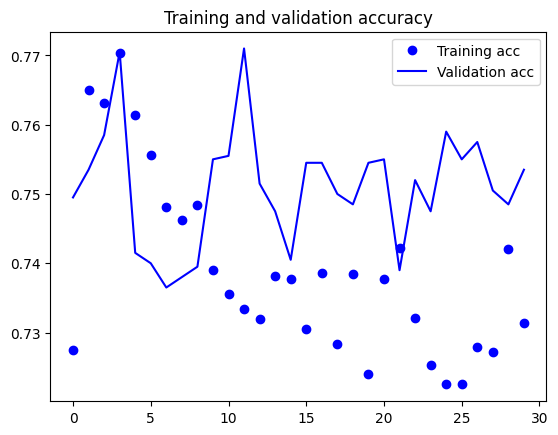

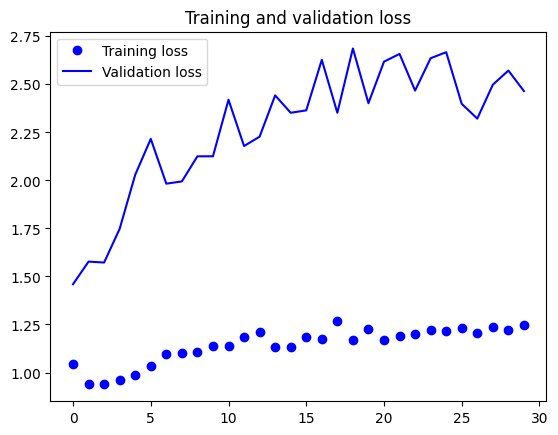

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Increased Model Complexity

In [138]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [139]:
inception_model3 = models.Sequential()
inception_model3.add(conv_base)
inception_model3.add(layers.Flatten())
inception_model3.add(layers.Dense(128, activation='relu')) # added a layer
inception_model3.add(layers.Dense(256, activation='relu'))
inception_model3.add(layers.Dropout(0.5))
inception_model3.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [140]:
inception_model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_15 (Flatten)        (None, 18432)             0         
                                                                 
 dense_38 (Dense)            (None, 128)               2359424   
                                                                 
 dense_39 (Dense)            (None, 256)               33024     
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 10)                2570      
                                                                 
Total params: 24,197,802
Trainable params: 8,468,554


In [141]:
inception_model3.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001/2), 
              metrics=['accuracy'])

In [142]:
history = inception_model3.fit(
      train_generator,
      steps_per_epoch=7502//10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//10,
      verbose=1)

Epoch 1/30
750/750 [==============================] - 51s 62ms/step - loss: 1.6389 - accuracy: 0.4677 - val_loss: 1.1723 - val_accuracy: 0.6600
Epoch 2/30
750/750 [==============================] - 53s 70ms/step - loss: 1.2848 - accuracy: 0.6005 - val_loss: 1.0923 - val_accuracy: 0.6980
Epoch 3/30
750/750 [==============================] - 61s 81ms/step - loss: 1.1502 - accuracy: 0.6450 - val_loss: 0.9417 - val_accuracy: 0.7225
Epoch 4/30
750/750 [==============================] - 64s 85ms/step - loss: 1.0395 - accuracy: 0.6815 - val_loss: 0.9114 - val_accuracy: 0.7435
Epoch 5/30
750/750 [==============================] - 62s 82ms/step - loss: 0.9901 - accuracy: 0.6931 - val_loss: 0.8715 - val_accuracy: 0.7455
Epoch 6/30
750/750 [==============================] - 61s 81ms/step - loss: 0.9330 - accuracy: 0.7094 - val_loss: 0.9261 - val_accuracy: 0.7290
Epoch 7/30
750/750 [==============================] - 64s 85ms/step - loss: 0.8716 - accuracy: 0.7298 - val_loss: 0.9028 - val_accuracy:

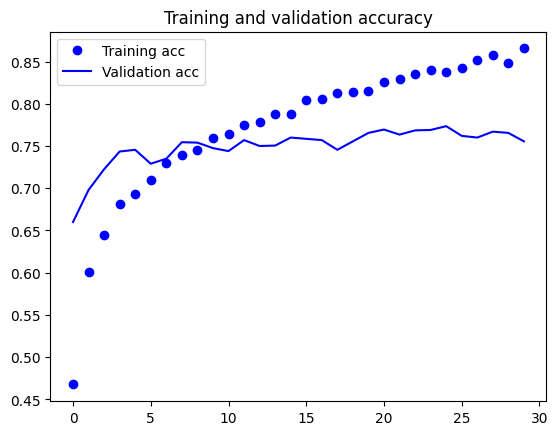

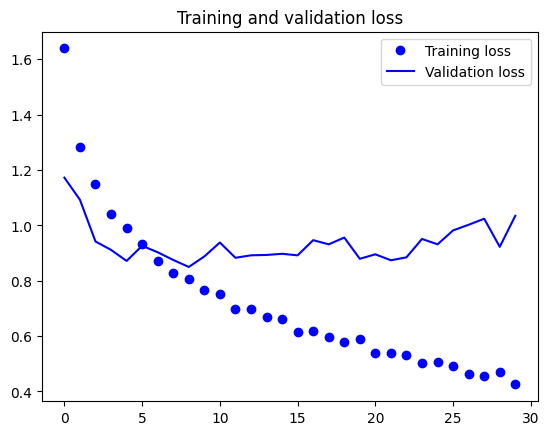

In [143]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Final InceptionV3 Model 

In [112]:
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [116]:
final_inception_model = models.Sequential()
final_inception_model.add(conv_base)
final_inception_model.add(layers.Flatten())
final_inception_model.add(layers.Dense(256, activation='relu'))
final_inception_model.add(layers.Dropout(0.5))
final_inception_model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [117]:
final_inception_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001/2), # changed optimizer to RMSprop
              metrics=['accuracy'])

In [118]:
history = final_inception_model.fit(
      train_generator,
      steps_per_epoch=7502//10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2007//10,
      verbose=1)

Epoch 1/30
750/750 [==============================] - 44s 54ms/step - loss: 1.7983 - accuracy: 0.4294 - val_loss: 1.1566 - val_accuracy: 0.6705
Epoch 2/30
750/750 [==============================] - 42s 56ms/step - loss: 1.5194 - accuracy: 0.5031 - val_loss: 1.1246 - val_accuracy: 0.6800
Epoch 3/30
750/750 [==============================] - 51s 68ms/step - loss: 1.4175 - accuracy: 0.5493 - val_loss: 1.0292 - val_accuracy: 0.7065
Epoch 4/30
750/750 [==============================] - 51s 67ms/step - loss: 1.3103 - accuracy: 0.5794 - val_loss: 0.9264 - val_accuracy: 0.7295
Epoch 5/30
750/750 [==============================] - 48s 64ms/step - loss: 1.2263 - accuracy: 0.6160 - val_loss: 0.9068 - val_accuracy: 0.7385
Epoch 6/30
750/750 [==============================] - 42s 56ms/step - loss: 1.2070 - accuracy: 0.6212 - val_loss: 0.8560 - val_accuracy: 0.7635
Epoch 7/30
750/750 [==============================] - 47s 63ms/step - loss: 1.1362 - accuracy: 0.6436 - val_loss: 0.8692 - val_accuracy:

750/750 [==============================] - 44s 54ms/step - loss: 1.7983 - accuracy: 0.4294 - val_loss: 1.1566 - val_accuracy: 0.6705
Epoch 2/30
750/750 [==============================] - 42s 56ms/step - loss: 1.5194 - accuracy: 0.5031 - val_loss: 1.1246 - val_accuracy: 0.6800
Epoch 3/30
750/750 [==============================] - 51s 68ms/step - loss: 1.4175 - accuracy: 0.5493 - val_loss: 1.0292 - val_accuracy: 0.7065
Epoch 4/30
750/750 [==============================] - 51s 67ms/step - loss: 1.3103 - accuracy: 0.5794 - val_loss: 0.9264 - val_accuracy: 0.7295
Epoch 5/30
750/750 [==============================] - 48s 64ms/step - loss: 1.2263 - accuracy: 0.6160 - val_loss: 0.9068 - val_accuracy: 0.7385
Epoch 6/30
750/750 [==============================] - 42s 56ms/step - loss: 1.2070 - accuracy: 0.6212 - val_loss: 0.8560 - val_accuracy: 0.7635
Epoch 7/30
750/750 [==============================] - 47s 63ms/step - loss: 1.1362 - accuracy: 0.6436 - val_loss: 0.8692 - val_accuracy: 0.7470
Epo

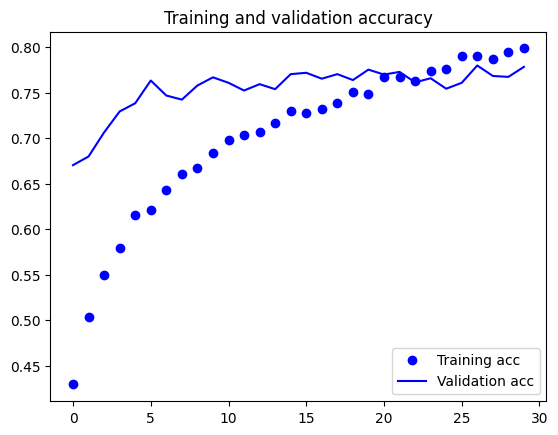

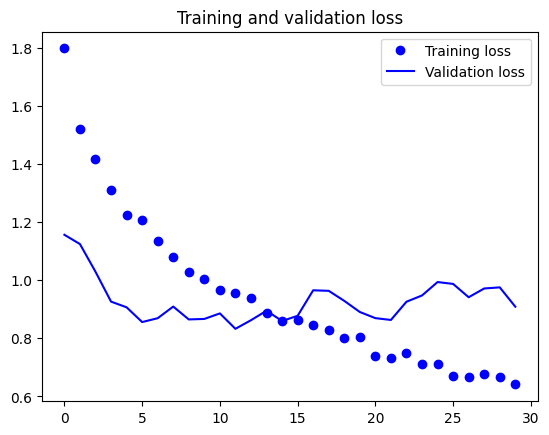

In [119]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [120]:
final_inception_model.save('final_inception_food_model.h5')

In [100]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='sparse')


test_loss, test_acc = final_inception_model.evaluate(test_generator, steps=502//10)
print('test acc:', test_acc)

Found 502 images belonging to 10 classes.
50/50 [==============================] - 3s 28ms/step - loss: 1.0480 - accuracy: 0.7300
test acc: 0.7300000190734863


50/50 [==============================] - 3s 28ms/step - loss: 1.0480 - accuracy: 0.7300
test acc: 0.7300000190734863


We can try another pretrained model to see how that performs

### MobileNet

In [144]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
img_size = 150

mobile_base = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [145]:
mobile_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 75, 75, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 75, 75, 32)       128       
 ation)                                         

Final feature map of (4,4,1024)

In [58]:
base_dir = 'C:\\Users\\marke\\DEEP LEARNING\\Assignment 1\\'

#train_dir = 'C:\\Users\\marke\\DEEP LEARNING\\Assignment 1\\train'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [61]:
datagen = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input) 
batch_size = 20
img_size = 150

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 1024))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='sparse')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = mobile_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7502)
validation_features, validation_labels = extract_features(validation_dir, 2007)
test_features, test_labels = extract_features(test_dir, 502)

Found 7502 images belonging to 10 classes.
1/1 [==============================] - 0s 38ms/step
Found 2007 images belonging to 10 classes.
1/1 [==============================] - 0s 40ms/step
Found 502 images belonging to 10 classes.
1/1 [==============================] - 0s 18ms/step


In [62]:
train_features = np.reshape(train_features, (7502, 4*4*1024))
validation_features = np.reshape(validation_features, (2007, 4*4*1024))
test_features = np.reshape(test_features, (502, 4*4*1024))

In [63]:
mobile_model = models.Sequential()
mobile_model.add(layers.Dense(256, activation='relu', input_dim=4*4*1024))
mobile_model.add(layers.Dense(10, activation='softmax'))

mobile_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               4194560   
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 4,197,130
Trainable params: 4,197,130
Non-trainable params: 0
_________________________________________________________________


In [64]:
mobile_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [65]:
history = mobile_model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
376/376 [==============================] - 2s 4ms/step - loss: 1.6483 - accuracy: 0.6441 - val_loss: 0.9086 - val_accuracy: 0.7050
Epoch 2/30
376/376 [==============================] - 1s 3ms/step - loss: 0.5195 - accuracy: 0.8286 - val_loss: 0.9309 - val_accuracy: 0.7040
Epoch 3/30
376/376 [==============================] - 1s 3ms/step - loss: 0.2535 - accuracy: 0.9150 - val_loss: 1.1395 - val_accuracy: 0.7220
Epoch 4/30
376/376 [==============================] - 1s 3ms/step - loss: 0.1226 - accuracy: 0.9592 - val_loss: 1.3031 - val_accuracy: 0.7155
Epoch 5/30
376/376 [==============================] - 1s 4ms/step - loss: 0.0853 - accuracy: 0.9732 - val_loss: 1.4370 - val_accuracy: 0.7000
Epoch 6/30
376/376 [==============================] - 1s 4ms/step - loss: 0.0688 - accuracy: 0.9777 - val_loss: 1.7498 - val_accuracy: 0.6971
Epoch 7/30
376/376 [==============================] - 1s 4ms/step - loss: 0.1199 - accuracy: 0.9613 - val_loss: 1.9453 - val_accuracy: 0.7020
Epoch 

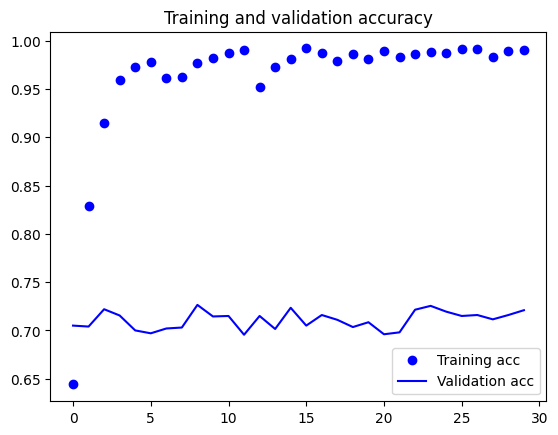

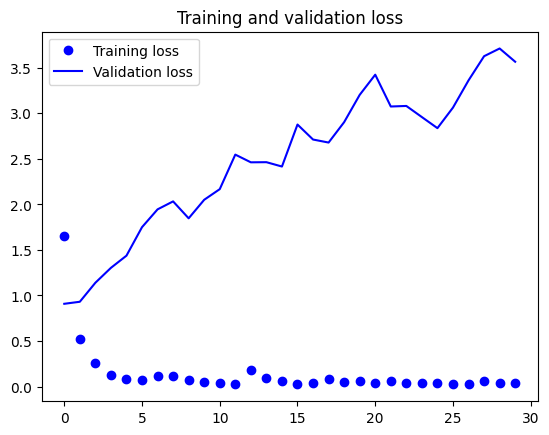

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Validation accuracy is hovering around 0.70 which is better than inceptionv3 without data augmentation. We can also see that the model starts overfitting almost immediately

In [146]:
mobile_model = models.Sequential()
mobile_model.add(mobile_base)
mobile_model.add(layers.Flatten())
mobile_model.add(layers.Dense(256, activation='relu'))
mobile_model.add(layers.Dense(10, activation='softmax'))

In [147]:
mobile_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 16384)             0         
                                                                 
 dense_41 (Dense)            (None, 256)               4194560   
                                                                 
 dense_42 (Dense)            (None, 10)                2570      
                                                                 
Total params: 7,425,994
Trainable params: 7,404,106
Non-trainable params: 21,888
_________________________________________________________________


In [148]:
mobile_base.trainable = False

In [149]:
mobile_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 16384)             0         
                                                                 
 dense_41 (Dense)            (None, 256)               4194560   
                                                                 
 dense_42 (Dense)            (None, 10)                2570      
                                                                 
Total params: 7,425,994
Trainable params: 4,197,130
Non-trainable params: 3,228,864
_________________________________________________________________


In [150]:
img_size = 150

train_datagen = ImageDataGenerator(
      preprocessing_function=mobilenet_preprocess_input,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input)

train_generator_20 = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

validation_generator_20 = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='sparse')

Found 7502 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.


In [151]:
mobile_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [152]:
history = mobile_model.fit(train_generator_20,
                    epochs=30,
                    batch_size=20,
                    steps_per_epoch=7502//20,
                    validation_data=validation_generator_20,
                    validation_steps=2007//20,
                    verbose=1)

Epoch 1/30
375/375 [==============================] - 42s 109ms/step - loss: 1.8001 - accuracy: 0.5671 - val_loss: 1.2012 - val_accuracy: 0.6205
Epoch 2/30
375/375 [==============================] - 39s 103ms/step - loss: 1.0473 - accuracy: 0.6603 - val_loss: 0.9095 - val_accuracy: 0.7145
Epoch 3/30
375/375 [==============================] - 41s 109ms/step - loss: 0.9117 - accuracy: 0.7029 - val_loss: 0.8324 - val_accuracy: 0.7415
Epoch 4/30
375/375 [==============================] - 42s 112ms/step - loss: 0.8467 - accuracy: 0.7255 - val_loss: 0.8375 - val_accuracy: 0.7355
Epoch 5/30
375/375 [==============================] - 39s 105ms/step - loss: 0.8231 - accuracy: 0.7306 - val_loss: 0.7598 - val_accuracy: 0.7650
Epoch 6/30
375/375 [==============================] - 41s 108ms/step - loss: 0.7721 - accuracy: 0.7441 - val_loss: 0.7859 - val_accuracy: 0.7525
Epoch 7/30
375/375 [==============================] - 38s 102ms/step - loss: 0.7489 - accuracy: 0.7551 - val_loss: 0.8031 - val_ac

In [153]:
mobile_acc = history.history['accuracy']
mobile_val_acc = history.history['val_accuracy']
mobile_loss = history.history['loss']
mobile_val_loss = history.history['val_loss']

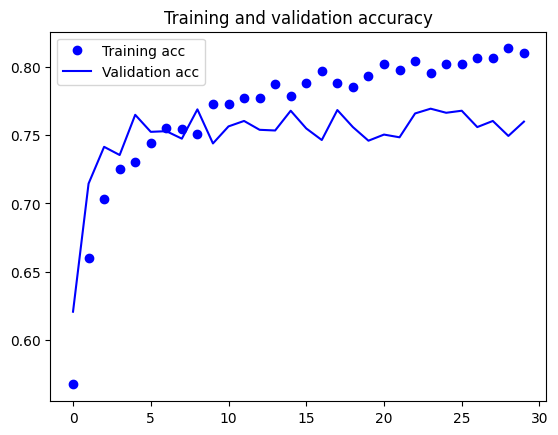

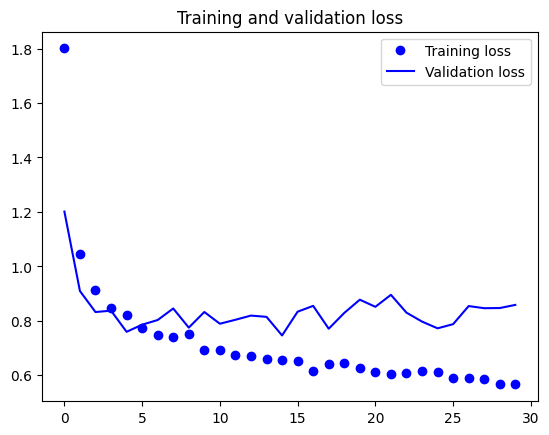

In [154]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Fine Tuning of MobileNet

In [162]:
mobile_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 75, 75, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 75, 75, 32)       128       
 ation)                                         

In [163]:
mobile_base.trainable = True

set_trainable = False
for layer in mobile_base.layers:
    if layer.name == 'conv_dw_12_relu': # three conv layers conv_pw_12 , conv_dw_13, conv_pw_13 
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
             
mobile_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 16384)             0         
                                                                 
 dense_41 (Dense)            (None, 256)               4194560   
                                                                 
 dense_42 (Dense)            (None, 10)                2570      
                                                                 
Total params: 7,425,994
Trainable params: 5,785,354
Non-trainable params: 1,640,640
_________________________________________________________________


In [164]:
mobile_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001/2),  # reduced default learning rate by 2
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [165]:
history_mobile2 = mobile_model.fit(train_generator,
                         epochs=30,
                         validation_data=validation_generator)

Epoch 1/30
751/751 [==============================] - 45s 58ms/step - loss: 1.1515 - accuracy: 0.6452 - val_loss: 1.2125 - val_accuracy: 0.6622
Epoch 2/30
751/751 [==============================] - 47s 63ms/step - loss: 0.9076 - accuracy: 0.7098 - val_loss: 0.9130 - val_accuracy: 0.7260
Epoch 3/30
751/751 [==============================] - 44s 58ms/step - loss: 0.8349 - accuracy: 0.7319 - val_loss: 1.4450 - val_accuracy: 0.6218
Epoch 4/30
751/751 [==============================] - 44s 58ms/step - loss: 0.7791 - accuracy: 0.7541 - val_loss: 0.8164 - val_accuracy: 0.7633
Epoch 5/30
751/751 [==============================] - 52s 69ms/step - loss: 0.7483 - accuracy: 0.7634 - val_loss: 1.0730 - val_accuracy: 0.7055
Epoch 6/30
751/751 [==============================] - 50s 67ms/step - loss: 0.7017 - accuracy: 0.7775 - val_loss: 0.9924 - val_accuracy: 0.7349
Epoch 7/30
751/751 [==============================] - 52s 69ms/step - loss: 0.6777 - accuracy: 0.7873 - val_loss: 0.9421 - val_accuracy:

751/751 [==============================] - 45s 58ms/step - loss: 1.1515 - accuracy: 0.6452 - val_loss: 1.2125 - val_accuracy: 0.6622
Epoch 2/30
751/751 [==============================] - 47s 63ms/step - loss: 0.9076 - accuracy: 0.7098 - val_loss: 0.9130 - val_accuracy: 0.7260
Epoch 3/30
751/751 [==============================] - 44s 58ms/step - loss: 0.8349 - accuracy: 0.7319 - val_loss: 1.4450 - val_accuracy: 0.6218
Epoch 4/30
751/751 [==============================] - 44s 58ms/step - loss: 0.7791 - accuracy: 0.7541 - val_loss: 0.8164 - val_accuracy: 0.7633
Epoch 5/30
751/751 [==============================] - 52s 69ms/step - loss: 0.7483 - accuracy: 0.7634 - val_loss: 1.0730 - val_accuracy: 0.7055
Epoch 6/30
751/751 [==============================] - 50s 67ms/step - loss: 0.7017 - accuracy: 0.7775 - val_loss: 0.9924 - val_accuracy: 0.7349
Epoch 7/30
751/751 [==============================] - 52s 69ms/step - loss: 0.6777 - accuracy: 0.7873 - val_loss: 0.9421 - val_accuracy: 0.7688
Epo

In [171]:
mobile_model.save('mobile_food_model.h5')

In [172]:
mobile_model = load_model('mobile_food_model.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [17]:
# Model #1
final_scratch_model = keras.models.load_model('scratch_food_model.h5')

In [21]:
test_loss, test_acc = final_scratch_model.evaluate(test_generator_32, steps=502//32)
print('test acc:', test_acc)

15/15 [==============================] - 2s 47ms/step - loss: 1.0235 - accuracy: 0.7146
test acc: 0.7145833373069763


In [22]:
test_steps = test_generator_32.n//test_generator_32.batch_size

test_labels_scratch = [] 
for i in range(test_steps + 1):
  test_labels_scratch.extend(test_generator_32[i][1])

#test_labels = np.argmax(test_labels, axis=0)
test_labels_scratch = np.array(test_labels_scratch)
#print(test_labels)

In [23]:
predicted_labels_scratch = np.argmax(final_scratch_model.predict(test_generator_32), axis=1) 

16/16 [==============================] - 2s 106ms/step


In [24]:
print(classification_report(test_labels_scratch, predicted_labels_scratch, target_names=classes))

                      precision    recall  f1-score   support

      beef_carpaccio       0.69      0.94      0.80        52
          crab_cakes       0.72      0.52      0.60        50
           escargots       0.68      0.88      0.77        50
             gnocchi       0.64      0.68      0.66        50
             lasagna       0.73      0.72      0.73        50
 macaroni_and_cheese       0.74      0.58      0.65        50
              samosa       0.66      0.66      0.66        50
        spring_rolls       0.74      0.52      0.61        50
strawberry_shortcake       0.80      0.80      0.80        50
               sushi       0.74      0.80      0.77        50

            accuracy                           0.71       502
           macro avg       0.72      0.71      0.70       502
        weighted avg       0.72      0.71      0.71       502



In [25]:
# Model #2
final_pretrained_model = keras.models.load_model('final_inception_food_model.h5')

In [26]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='sparse')

test_loss, test_acc = final_pretrained_model.evaluate(test_generator, steps=502//10)
print('test acc:', test_acc)

Found 502 images belonging to 10 classes.
50/50 [==============================] - 3s 30ms/step - loss: 1.0479 - accuracy: 0.7300
test acc: 0.7300000190734863


50/50 [==============================] - 3s 30ms/step - loss: 1.0479 - accuracy: 0.7300
test acc: 0.7300000190734863


In [27]:
test_steps = test_generator.n//test_generator.batch_size

test_labels_pretrained = [] 
for i in range(test_steps + 1):
  test_labels_pretrained.extend(test_generator[i][1])

#test_labels = np.argmax(test_labels, axis=0)
test_labels_pretrained = np.array(test_labels_pretrained)
#print(test_labels)

In [28]:
predicted_labels_pretrained = np.argmax(final_pretrained_model.predict(test_generator), axis=1) 

51/51 [==============================] - 2s 30ms/step


In [29]:
print(classification_report(test_labels_pretrained, predicted_labels_pretrained, target_names=classes))

                      precision    recall  f1-score   support

      beef_carpaccio       0.76      0.85      0.80        52
          crab_cakes       0.58      0.66      0.62        50
           escargots       0.90      0.70      0.79        50
             gnocchi       0.67      0.72      0.69        50
             lasagna       0.70      0.70      0.70        50
 macaroni_and_cheese       0.80      0.70      0.74        50
              samosa       0.68      0.68      0.68        50
        spring_rolls       0.76      0.68      0.72        50
strawberry_shortcake       0.74      0.90      0.81        50
               sushi       0.82      0.72      0.77        50

            accuracy                           0.73       502
           macro avg       0.74      0.73      0.73       502
        weighted avg       0.74      0.73      0.73       502



In [32]:
# Save the best model


final_pretrained_model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [33]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [34]:
# Load the food list (in alphabetical order)
with open('17.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beef_carpaccio', 'crab_cakes', 'escargots', 'gnocchi', 'lasagna', 'macaroni_and_cheese', 'samosa', 'spring_rolls', 'strawberry_shortcake', 'sushi']


In [35]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

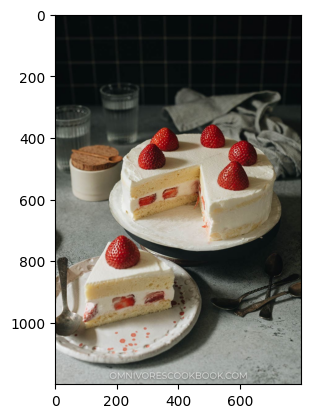

1/1 [==============================] - 1s 1s/step
The prediction is:  strawberry_shortcake 

    beef_carpaccio  crab_cakes     escargots   gnocchi  lasagna  \
0         0.00002    0.000024  4.309968e-08  0.000012  0.00015   

   macaroni_and_cheese    samosa  spring_rolls  strawberry_shortcake     sushi  
0             0.000011  0.000089      0.000161              0.999078  0.000454  


In [36]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'Strawberry Shortcake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

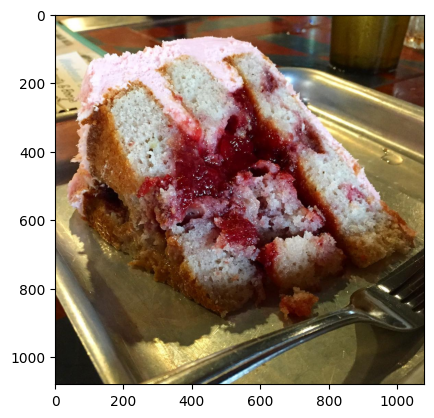

1/1 [==============================] - 0s 32ms/step
The prediction is:  strawberry_shortcake 

    beef_carpaccio  crab_cakes  escargots   gnocchi   lasagna  \
0        0.011084     0.00499   0.000249  0.062321  0.158761   

   macaroni_and_cheese    samosa  spring_rolls  strawberry_shortcake     sushi  
0             0.018091  0.006846      0.010781              0.715122  0.011756  


In [37]:
img = 'Strawberry Shortcake 2.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

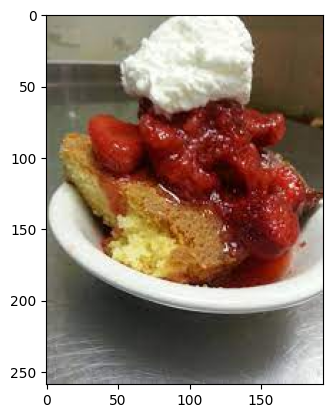

1/1 [==============================] - 0s 35ms/step
The prediction is:  strawberry_shortcake 

    beef_carpaccio    crab_cakes     escargots   gnocchi   lasagna  \
0    3.445035e-07  3.489200e-08  3.508697e-10  0.000004  0.000001   

   macaroni_and_cheese    samosa  spring_rolls  strawberry_shortcake     sushi  
0             0.000001  0.000001      0.000068              0.999917  0.000006  


In [38]:
img = 'Strawberry Shortcake 3.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

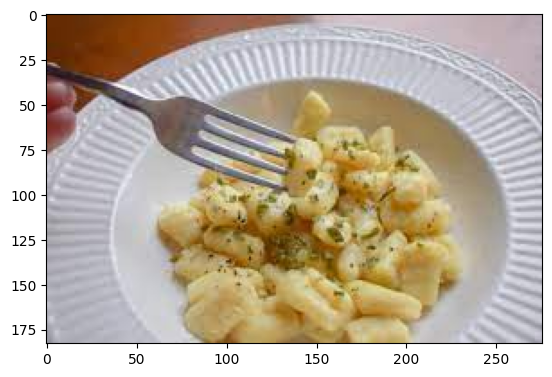

1/1 [==============================] - 0s 28ms/step
The prediction is:  gnocchi 

    beef_carpaccio  crab_cakes  escargots  gnocchi   lasagna  \
0        0.000272    0.005025   0.000749  0.93127  0.003635   

   macaroni_and_cheese    samosa  spring_rolls  strawberry_shortcake     sushi  
0             0.057396  0.001401      0.000035              0.000115  0.000102  


In [39]:
img = 'Gnocchi.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

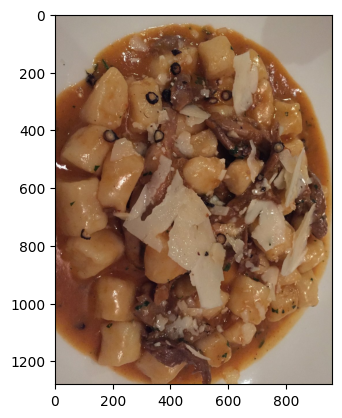

1/1 [==============================] - 0s 25ms/step
The prediction is:  gnocchi 

    beef_carpaccio  crab_cakes  escargots   gnocchi   lasagna  \
0        0.000009    0.000063   0.000195  0.998528  0.000073   

   macaroni_and_cheese    samosa  spring_rolls  strawberry_shortcake  \
0             0.001132  0.000002  5.437643e-10          2.416708e-09   

          sushi  
0  2.701573e-08  


In [40]:
img = 'Gnocchi 2.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

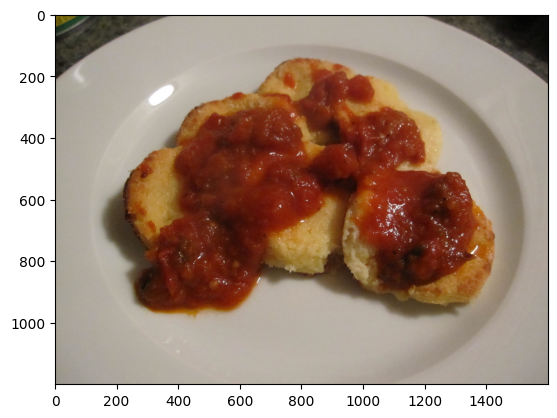

1/1 [==============================] - 0s 26ms/step
The prediction is:  crab_cakes 

    beef_carpaccio  crab_cakes  escargots   gnocchi   lasagna  \
0        0.005445    0.343085   0.002376  0.238433  0.016474   

   macaroni_and_cheese    samosa  spring_rolls  strawberry_shortcake     sushi  
0             0.013852  0.020075      0.031941              0.155501  0.172819  


In [41]:
img = 'Gnocchi 3.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)